In [1]:
'''
Test - window button connection 

'''

'\nTest - window button connection \n\n'

In [ ]:
#GUI library imports 
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QDialog, QApplication, QFileDialog, QLineEdit, QDialogButtonBox, QFormLayout
from PyQt5.uic import loadUi
#from pyqtgraph import GraphicsLayout#from pyqtgraph import PlotWidget
from pyqtgraph import GraphicsLayoutWidget, PlotWidget
import pyqtgraph as pg 
import math 
import bruges as bg 

#well file handling library imports 
import welly
from welly import Well
import pandas as pd
import lasio
import numpy as np

#Testing library: time 
#import time

class Ui_MainWindow(object):
    def __init__(self):
        # All data loading parameters for well 1 
        self.well1name = '' #UWI
        self.dlog_start1 = 0 # depth of loggin start for well 1
        self.well1kb = 0
        self.dblwseisdat1 = 0 # distance below seismic datum 
        self.log_start_time1 = 0 # well 1 log start time (TWT units:s)
        self.well1 = [] # well 1 data 
        self.well1df = []
        self.seis_data1 = [] # seismic datum 
        self.repl_vel1 = [] # seismic velocity 
        self.havesonic1 = False
        self.havedensity1 = False
        self.densitymnemonic1 = None
        self.sonic_mnemonic1 = None
        self.well1topsdf = pd.DataFrame()
        self.timedepthpair1 = {'ss': None,'t':None}
        self.bulkshiftchange1 = False #bulk shift change 
        self.SSchange1 = False # Stretch Squeeze change
        
        #All data loading parameters for well 2
        self.well2name = '' #UWI
        self.dlog_start2 = 0 # depth of loggin start for well 1
        self.well2kb = 0
        self.dblwseisdat2 = 0 # distance below seismic datum 
        self.log_start_time2 = 0 # well 1 log start time (TWT units:s)
        self.well2 = [] # well 1 data 
        self.well2df = []
        self.seis_data2 = [] # seismic datum 
        self.repl_vel2 = [] # seismic velocity 
        self.havesonic2 = False
        self.havedensity2 = False
        self.densitymnemonic2 = None
        self.sonic_mnemonic2 = None
        self.well2topsdf = pd.DataFrame()
        self.timedepthpair2 = {'ss': None,'t':None}
        self.bulkshiftchange2 = False #bulk shift change 
        self.SSchange2 = False # Stretch Squeeze change
        # All data for synthetic generation for well 1 and 2
        self.well1df_tdom= pd.DataFrame()
        self.well2df_tdom= pd.DataFrame()
        
        #variable for adding synchanges
        self.syntiechange = False


    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(1849, 986)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.MinimumExpanding, QtWidgets.QSizePolicy.MinimumExpanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(MainWindow.sizePolicy().hasHeightForWidth())
        MainWindow.setSizePolicy(sizePolicy)
        MainWindow.setAutoFillBackground(False)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.gridLayout_4 = QtWidgets.QGridLayout(self.centralwidget)
        self.gridLayout_4.setObjectName("gridLayout_4")
        self.WindowFrame = QtWidgets.QFrame(self.centralwidget)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Expanding, QtWidgets.QSizePolicy.Expanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.WindowFrame.sizePolicy().hasHeightForWidth())
        self.WindowFrame.setSizePolicy(sizePolicy)
        self.WindowFrame.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.WindowFrame.setFrameShadow(QtWidgets.QFrame.Raised)
        self.WindowFrame.setObjectName("WindowFrame")
        self.gridLayout_3 = QtWidgets.QGridLayout(self.WindowFrame)
        self.gridLayout_3.setObjectName("gridLayout_3")
        self.Header_Frame = QtWidgets.QFrame(self.WindowFrame)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Expanding, QtWidgets.QSizePolicy.Expanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Header_Frame.sizePolicy().hasHeightForWidth())
        self.Header_Frame.setSizePolicy(sizePolicy)
        self.Header_Frame.setMinimumSize(QtCore.QSize(1200, 100))
        self.Header_Frame.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.Header_Frame.setFrameShadow(QtWidgets.QFrame.Raised)
        self.Header_Frame.setObjectName("Header_Frame")
        self.horizontalLayout_2 = QtWidgets.QHBoxLayout(self.Header_Frame)
        self.horizontalLayout_2.setObjectName("horizontalLayout_2")
        self.well1_wellinfo = QtWidgets.QFrame(self.Header_Frame)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Expanding, QtWidgets.QSizePolicy.Expanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.well1_wellinfo.sizePolicy().hasHeightForWidth())
        self.well1_wellinfo.setSizePolicy(sizePolicy)
        self.well1_wellinfo.setMinimumSize(QtCore.QSize(200, 100))
        self.well1_wellinfo.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.well1_wellinfo.setFrameShadow(QtWidgets.QFrame.Raised)
        self.well1_wellinfo.setObjectName("well1_wellinfo")
        self.horizontalLayout_2.addWidget(self.well1_wellinfo)
        self.synthethic_options_frame = QtWidgets.QFrame(self.Header_Frame)
        self.synthethic_options_frame.setEnabled(True)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Fixed, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.synthethic_options_frame.sizePolicy().hasHeightForWidth())
        self.synthethic_options_frame.setSizePolicy(sizePolicy)
        self.synthethic_options_frame.setAcceptDrops(False)
        self.synthethic_options_frame.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.synthethic_options_frame.setFrameShadow(QtWidgets.QFrame.Raised)
        self.synthethic_options_frame.setObjectName("synthethic_options_frame")
        self.gridLayout = QtWidgets.QGridLayout(self.synthethic_options_frame)
        self.gridLayout.setSizeConstraint(QtWidgets.QLayout.SetFixedSize)
        self.gridLayout.setObjectName("gridLayout")
        self.HCF_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.HCF_label.setObjectName("HCF_label")
        self.gridLayout.addWidget(self.HCF_label, 2, 5, 1, 1)
        self.LCF_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.LCF_label.setObjectName("LCF_label")
        self.gridLayout.addWidget(self.LCF_label, 1, 2, 1, 1)
        self.wavelet_well_sel_comboBox = QtWidgets.QComboBox(self.synthethic_options_frame)
        self.wavelet_well_sel_comboBox.setObjectName("wavelet_well_sel_comboBox")
        self.wavelet_well_sel_comboBox.addItem("")
        self.wavelet_well_sel_comboBox.addItem("")
        self.gridLayout.addWidget(self.wavelet_well_sel_comboBox, 3, 9, 1, 1)
        self.LPF_LCD = QtWidgets.QLCDNumber(self.synthethic_options_frame)
        self.LPF_LCD.setProperty("intValue", 20)
        self.LPF_LCD.setObjectName("LPF_LCD")
        self.gridLayout.addWidget(self.LPF_LCD, 2, 4, 1, 1)
        self.wavelet_well_sel_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.wavelet_well_sel_label.setLayoutDirection(QtCore.Qt.LeftToRight)
        self.wavelet_well_sel_label.setObjectName("wavelet_well_sel_label")
        self.gridLayout.addWidget(self.wavelet_well_sel_label, 3, 8, 1, 1)
        self.HPF_slider = QtWidgets.QSlider(self.synthethic_options_frame)
        self.HPF_slider.setMinimum(2)
        self.HPF_slider.setMaximum(200)
        self.HPF_slider.setProperty("value", 40)
        self.HPF_slider.setOrientation(QtCore.Qt.Horizontal)
        self.HPF_slider.setTickPosition(QtWidgets.QSlider.TicksAbove)
        self.HPF_slider.setTickInterval(10)
        self.HPF_slider.setObjectName("HPF_slider")
        self.gridLayout.addWidget(self.HPF_slider, 1, 6, 1, 1)
        self.sample_rate_comboBox = QtWidgets.QComboBox(self.synthethic_options_frame)
        self.sample_rate_comboBox.setObjectName("sample_rate_comboBox")
        self.sample_rate_comboBox.addItem("")
        self.sample_rate_comboBox.addItem("")
        self.sample_rate_comboBox.addItem("")
        self.gridLayout.addWidget(self.sample_rate_comboBox, 3, 1, 1, 1)
        self.HPF_checkbox = QtWidgets.QCheckBox(self.synthethic_options_frame)
        self.HPF_checkbox.setObjectName("HPF_checkbox")
        self.gridLayout.addWidget(self.HPF_checkbox, 3, 5, 1, 2)
        self.Phase_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.Phase_label.setObjectName("Phase_label")
        self.gridLayout.addWidget(self.Phase_label, 2, 8, 1, 1)
        self.HPF_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.HPF_label.setObjectName("HPF_label")
        self.gridLayout.addWidget(self.HPF_label, 1, 5, 1, 1)
        self.LCF_LCD = QtWidgets.QLCDNumber(self.synthethic_options_frame)
        font = QtGui.QFont()
        font.setBold(True)
        font.setWeight(75)
        self.LCF_LCD.setFont(font)
        self.LCF_LCD.setFocusPolicy(QtCore.Qt.NoFocus)
        self.LCF_LCD.setLineWidth(1)
        self.LCF_LCD.setMidLineWidth(0)
        self.LCF_LCD.setProperty("intValue", 10)
        self.LCF_LCD.setObjectName("LCF_LCD")
        self.gridLayout.addWidget(self.LCF_LCD, 1, 4, 1, 1)
        self.HPF_multiplier = QtWidgets.QLineEdit(self.synthethic_options_frame)
        self.HPF_multiplier.setObjectName("HPF_multiplier")
        self.gridLayout.addWidget(self.HPF_multiplier, 3, 7, 1, 1)
        self.HCF_slider = QtWidgets.QSlider(self.synthethic_options_frame)
        self.HCF_slider.setMinimum(3)
        self.HCF_slider.setMaximum(200)
        self.HCF_slider.setProperty("value", 50)
        self.HCF_slider.setOrientation(QtCore.Qt.Horizontal)
        self.HCF_slider.setTickPosition(QtWidgets.QSlider.TicksAbove)
        self.HCF_slider.setTickInterval(10)
        self.HCF_slider.setObjectName("HCF_slider")
        self.gridLayout.addWidget(self.HCF_slider, 2, 6, 1, 1)
        self.Phase_slider = QtWidgets.QSlider(self.synthethic_options_frame)
        self.Phase_slider.setMaximum(360)
        self.Phase_slider.setOrientation(QtCore.Qt.Horizontal)
        self.Phase_slider.setTickPosition(QtWidgets.QSlider.TicksAbove)
        self.Phase_slider.setTickInterval(30)
        self.Phase_slider.setObjectName("Phase_slider")
        self.gridLayout.addWidget(self.Phase_slider, 2, 9, 1, 1)
        self.HPF_LCD = QtWidgets.QLCDNumber(self.synthethic_options_frame)
        self.HPF_LCD.setProperty("intValue", 40)
        self.HPF_LCD.setObjectName("HPF_LCD")
        self.gridLayout.addWidget(self.HPF_LCD, 1, 7, 1, 1)
        self.HCF_LCD = QtWidgets.QLCDNumber(self.synthethic_options_frame)
        self.HCF_LCD.setProperty("intValue", 50)
        self.HCF_LCD.setObjectName("HCF_LCD")
        self.gridLayout.addWidget(self.HCF_LCD, 2, 7, 1, 1)
        self.wave_type_comboBox = QtWidgets.QComboBox(self.synthethic_options_frame)
        self.wave_type_comboBox.setObjectName("wave_type_comboBox")
        self.wave_type_comboBox.addItem("")
        self.wave_type_comboBox.addItem("")
        self.wave_type_comboBox.addItem("")
        self.wave_type_comboBox.addItem("")
        self.gridLayout.addWidget(self.wave_type_comboBox, 0, 1, 1, 1)
        self.wave_length_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.wave_length_label.setObjectName("wave_length_label")
        self.gridLayout.addWidget(self.wave_length_label, 1, 0, 1, 1)
        self.LPF_slider = QtWidgets.QSlider(self.synthethic_options_frame)
        self.LPF_slider.setMinimum(1)
        self.LPF_slider.setMaximum(100)
        self.LPF_slider.setProperty("value", 20)
        self.LPF_slider.setOrientation(QtCore.Qt.Horizontal)
        self.LPF_slider.setTickPosition(QtWidgets.QSlider.TicksAbove)
        self.LPF_slider.setTickInterval(10)
        self.LPF_slider.setObjectName("LPF_slider")
        self.gridLayout.addWidget(self.LPF_slider, 2, 3, 1, 1)
        self.Create_Synthetic = QtWidgets.QPushButton(self.synthethic_options_frame)
        self.Create_Synthetic.setObjectName("Create_Synthetic")
        self.gridLayout.addWidget(self.Create_Synthetic, 3, 10, 1, 1)
        self.sample_rate_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.sample_rate_label.setObjectName("sample_rate_label")
        self.gridLayout.addWidget(self.sample_rate_label, 3, 0, 1, 1)
        self.LCF_multiplier = QtWidgets.QLineEdit(self.synthethic_options_frame)
        self.LCF_multiplier.setObjectName("LCF_multiplier")
        self.gridLayout.addWidget(self.LCF_multiplier, 3, 4, 1, 1)
        self.Phase_LCD = QtWidgets.QLCDNumber(self.synthethic_options_frame)
        self.Phase_LCD.setObjectName("Phase_LCD")
        self.gridLayout.addWidget(self.Phase_LCD, 2, 10, 1, 1)
        self.wave_type_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.wave_type_label.setObjectName("wave_type_label")
        self.gridLayout.addWidget(self.wave_type_label, 0, 0, 1, 1)
        self.LCF_slider = QtWidgets.QSlider(self.synthethic_options_frame)
        self.LCF_slider.setEnabled(True)
        self.LCF_slider.setMinimum(1)
        self.LCF_slider.setMaximum(100)
        self.LCF_slider.setProperty("value", 10)
        self.LCF_slider.setOrientation(QtCore.Qt.Horizontal)
        self.LCF_slider.setTickPosition(QtWidgets.QSlider.TicksAbove)
        self.LCF_slider.setTickInterval(10)
        self.LCF_slider.setObjectName("LCF_slider")
        self.gridLayout.addWidget(self.LCF_slider, 1, 3, 1, 1)
        self.LPF_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.LPF_label.setObjectName("LPF_label")
        self.gridLayout.addWidget(self.LPF_label, 2, 2, 1, 1)
        self.Amp_slider = QtWidgets.QSlider(self.synthethic_options_frame)
        self.Amp_slider.setMinimum(1)
        self.Amp_slider.setMaximum(100)
        self.Amp_slider.setPageStep(1)
        self.Amp_slider.setOrientation(QtCore.Qt.Horizontal)
        self.Amp_slider.setTickPosition(QtWidgets.QSlider.TicksAbove)
        self.Amp_slider.setObjectName("Amp_slider")
        self.gridLayout.addWidget(self.Amp_slider, 1, 9, 1, 1)
        self.Wavelet_Title = QtWidgets.QLabel(self.synthethic_options_frame)
        self.Wavelet_Title.setAlignment(QtCore.Qt.AlignCenter)
        self.Wavelet_Title.setObjectName("Wavelet_Title")
        self.gridLayout.addWidget(self.Wavelet_Title, 0, 5, 1, 1)
        self.Amplitude_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.Amplitude_label.setObjectName("Amplitude_label")
        self.gridLayout.addWidget(self.Amplitude_label, 1, 8, 1, 1)
        self.max_time_label = QtWidgets.QLabel(self.synthethic_options_frame)
        self.max_time_label.setObjectName("max_time_label")
        self.gridLayout.addWidget(self.max_time_label, 2, 0, 1, 1)
        self.wave_length_comboBox = QtWidgets.QComboBox(self.synthethic_options_frame)
        self.wave_length_comboBox.setObjectName("wave_length_comboBox")
        self.wave_length_comboBox.addItem("")
        self.wave_length_comboBox.addItem("")
        self.wave_length_comboBox.addItem("")
        self.gridLayout.addWidget(self.wave_length_comboBox, 1, 1, 1, 1)
        self.Amp_LCD = QtWidgets.QLCDNumber(self.synthethic_options_frame)
        self.Amp_LCD.setProperty("intValue", 1)
        self.Amp_LCD.setObjectName("Amp_LCD")
        self.gridLayout.addWidget(self.Amp_LCD, 1, 10, 1, 1)
        self.LCF_checkBox = QtWidgets.QCheckBox(self.synthethic_options_frame)
        self.LCF_checkBox.setChecked(False)
        self.LCF_checkBox.setObjectName("LCF_checkBox")
        self.gridLayout.addWidget(self.LCF_checkBox, 3, 2, 1, 2)
        self.max_time_comboBox = QtWidgets.QComboBox(self.synthethic_options_frame)
        self.max_time_comboBox.setObjectName("max_time_comboBox")
        self.max_time_comboBox.addItem("")
        self.max_time_comboBox.addItem("")
        self.max_time_comboBox.addItem("")
        self.gridLayout.addWidget(self.max_time_comboBox, 2, 1, 1, 1)
        self.horizontalLayout_2.addWidget(self.synthethic_options_frame)
        self.well2_wellinfo = QtWidgets.QFrame(self.Header_Frame)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Expanding, QtWidgets.QSizePolicy.Expanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.well2_wellinfo.sizePolicy().hasHeightForWidth())
        self.well2_wellinfo.setSizePolicy(sizePolicy)
        self.well2_wellinfo.setMinimumSize(QtCore.QSize(200, 100))
        self.well2_wellinfo.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.well2_wellinfo.setFrameShadow(QtWidgets.QFrame.Raised)
        self.well2_wellinfo.setObjectName("well2_wellinfo")
        self.horizontalLayout_2.addWidget(self.well2_wellinfo)
        self.gridLayout_3.addWidget(self.Header_Frame, 0, 0, 1, 1)
        self.Mainframe_Plotting = QtWidgets.QFrame(self.WindowFrame)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.MinimumExpanding, QtWidgets.QSizePolicy.Expanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Mainframe_Plotting.sizePolicy().hasHeightForWidth())
        self.Mainframe_Plotting.setSizePolicy(sizePolicy)
        self.Mainframe_Plotting.setMinimumSize(QtCore.QSize(0, 641))
        self.Mainframe_Plotting.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.Mainframe_Plotting.setFrameShadow(QtWidgets.QFrame.Raised)
        self.Mainframe_Plotting.setObjectName("Mainframe_Plotting")
        self.gridLayout_7 = QtWidgets.QGridLayout(self.Mainframe_Plotting)
        self.gridLayout_7.setObjectName("gridLayout_7")
        self.Well2Plots = GraphicsLayoutWidget(self.Mainframe_Plotting)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.MinimumExpanding, QtWidgets.QSizePolicy.MinimumExpanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Well2Plots.sizePolicy().hasHeightForWidth())
        self.Well2Plots.setSizePolicy(sizePolicy)
        self.Well2Plots.setMinimumSize(QtCore.QSize(600, 600))
        self.Well2Plots.setObjectName("Well2Plots")
        self.gridLayout_7.addWidget(self.Well2Plots, 0, 2, 1, 1)
        self.Well1InfoFrame = QtWidgets.QFrame(self.Mainframe_Plotting)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Fixed, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Well1InfoFrame.sizePolicy().hasHeightForWidth())
        self.Well1InfoFrame.setSizePolicy(sizePolicy)
        self.Well1InfoFrame.setMinimumSize(QtCore.QSize(240, 600))
        self.Well1InfoFrame.setFrameShape(QtWidgets.QFrame.Box)
        self.Well1InfoFrame.setFrameShadow(QtWidgets.QFrame.Raised)
        self.Well1InfoFrame.setObjectName("Well1InfoFrame")
        self.verticalLayout = QtWidgets.QVBoxLayout(self.Well1InfoFrame)
        self.verticalLayout.setObjectName("verticalLayout")
        self.Well_1tabWidget = QtWidgets.QTabWidget(self.Well1InfoFrame)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.MinimumExpanding, QtWidgets.QSizePolicy.MinimumExpanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Well_1tabWidget.sizePolicy().hasHeightForWidth())
        self.Well_1tabWidget.setSizePolicy(sizePolicy)
        self.Well_1tabWidget.setObjectName("Well_1tabWidget")
        self.Well1ViewerTab = QtWidgets.QWidget()
        self.Well1ViewerTab.setObjectName("Well1ViewerTab")
        self.gridLayout_6 = QtWidgets.QGridLayout(self.Well1ViewerTab)
        self.gridLayout_6.setObjectName("gridLayout_6")
        self.wellinfoframe = QtWidgets.QFrame(self.Well1ViewerTab)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.MinimumExpanding, QtWidgets.QSizePolicy.MinimumExpanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.wellinfoframe.sizePolicy().hasHeightForWidth())
        self.wellinfoframe.setSizePolicy(sizePolicy)
        self.wellinfoframe.setMinimumSize(QtCore.QSize(200, 280))
        self.wellinfoframe.setFrameShape(QtWidgets.QFrame.Box)
        self.wellinfoframe.setFrameShadow(QtWidgets.QFrame.Raised)
        self.wellinfoframe.setLineWidth(2)
        self.wellinfoframe.setObjectName("wellinfoframe")
        self.gridLayout_2 = QtWidgets.QGridLayout(self.wellinfoframe)
        self.gridLayout_2.setObjectName("gridLayout_2")
        self.Track1dropdown = QtWidgets.QLabel(self.wellinfoframe)
        self.Track1dropdown.setFrameShape(QtWidgets.QFrame.Box)
        self.Track1dropdown.setObjectName("Track1dropdown")
        self.gridLayout_2.addWidget(self.Track1dropdown, 1, 0, 1, 1)
        self.comboBox_Track2 = QtWidgets.QComboBox(self.wellinfoframe)
        self.comboBox_Track2.setObjectName("comboBox_Track2")
        self.gridLayout_2.addWidget(self.comboBox_Track2, 4, 0, 1, 2)
        self.comboBox_Track3 = QtWidgets.QComboBox(self.wellinfoframe)
        self.comboBox_Track3.setObjectName("comboBox_Track3")
        self.gridLayout_2.addWidget(self.comboBox_Track3, 6, 0, 1, 2)
        self.Well1_Track2_Link_Checkbox = QtWidgets.QCheckBox(self.wellinfoframe)
        self.Well1_Track2_Link_Checkbox.setObjectName("Well1_Track2_Link_Checkbox")
        self.gridLayout_2.addWidget(self.Well1_Track2_Link_Checkbox, 3, 1, 1, 1)
        self.Well1_Track3_Link_Checkbox = QtWidgets.QCheckBox(self.wellinfoframe)
        self.Well1_Track3_Link_Checkbox.setObjectName("Well1_Track3_Link_Checkbox")
        self.gridLayout_2.addWidget(self.Well1_Track3_Link_Checkbox, 5, 1, 1, 1)
        self.Track3dropdown = QtWidgets.QLabel(self.wellinfoframe)
        self.Track3dropdown.setFrameShape(QtWidgets.QFrame.Box)
        self.Track3dropdown.setObjectName("Track3dropdown")
        self.gridLayout_2.addWidget(self.Track3dropdown, 5, 0, 1, 1)
        self.Well1_TWT_checkBox = QtWidgets.QCheckBox(self.wellinfoframe)
        self.Well1_TWT_checkBox.setLayoutDirection(QtCore.Qt.RightToLeft)
        self.Well1_TWT_checkBox.setAutoFillBackground(False)
        self.Well1_TWT_checkBox.setObjectName("Well1_TWT_checkBox")
        self.gridLayout_2.addWidget(self.Well1_TWT_checkBox, 7, 0, 1, 1)
        self.comboBox_Track1 = QtWidgets.QComboBox(self.wellinfoframe)
        self.comboBox_Track1.setObjectName("comboBox_Track1")
        self.gridLayout_2.addWidget(self.comboBox_Track1, 2, 0, 1, 2)
        self.Well_info_label = QtWidgets.QLabel(self.wellinfoframe)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Preferred, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Well_info_label.sizePolicy().hasHeightForWidth())
        self.Well_info_label.setSizePolicy(sizePolicy)
        self.Well_info_label.setMinimumSize(QtCore.QSize(0, 20))
        self.Well_info_label.setFrameShape(QtWidgets.QFrame.Box)
        self.Well_info_label.setAlignment(QtCore.Qt.AlignCenter)
        self.Well_info_label.setObjectName("Well_info_label")
        self.gridLayout_2.addWidget(self.Well_info_label, 0, 0, 1, 2)
        self.Well1_Track1_Link_Checkbox = QtWidgets.QCheckBox(self.wellinfoframe)
        self.Well1_Track1_Link_Checkbox.setObjectName("Well1_Track1_Link_Checkbox")
        self.gridLayout_2.addWidget(self.Well1_Track1_Link_Checkbox, 1, 1, 1, 1)
        self.Track2dropdown = QtWidgets.QLabel(self.wellinfoframe)
        self.Track2dropdown.setFrameShape(QtWidgets.QFrame.Box)
        self.Track2dropdown.setObjectName("Track2dropdown")
        self.gridLayout_2.addWidget(self.Track2dropdown, 3, 0, 1, 1)
        self.gridLayout_6.addWidget(self.wellinfoframe, 0, 0, 1, 1)
        self.Well_1tabWidget.addTab(self.Well1ViewerTab, "")
        self.tab_2 = QtWidgets.QWidget()
        self.tab_2.setObjectName("tab_2")
        self.BulkShiftpushButton_1 = QtWidgets.QPushButton(self.tab_2)
        self.BulkShiftpushButton_1.setGeometry(QtCore.QRect(60, 40, 93, 28))
        self.BulkShiftpushButton_1.setObjectName("BulkShiftpushButton_1")
        self.StretchSqueezepushButton_1 = QtWidgets.QPushButton(self.tab_2)
        self.StretchSqueezepushButton_1.setGeometry(QtCore.QRect(50, 100, 111, 28))
        self.StretchSqueezepushButton_1.setObjectName("StretchSqueezepushButton_1")
        self.Well_1tabWidget.addTab(self.tab_2, "")
        self.verticalLayout.addWidget(self.Well_1tabWidget)
        self.Synthetic_Graph_Widget = QtWidgets.QWidget(self.Well1InfoFrame)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Fixed, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Synthetic_Graph_Widget.sizePolicy().hasHeightForWidth())
        self.Synthetic_Graph_Widget.setSizePolicy(sizePolicy)
        self.Synthetic_Graph_Widget.setMinimumSize(QtCore.QSize(220, 300))
        self.Synthetic_Graph_Widget.setMaximumSize(QtCore.QSize(200, 300))
        self.Synthetic_Graph_Widget.setObjectName("Synthetic_Graph_Widget")
        self.verticalLayout_3 = QtWidgets.QVBoxLayout(self.Synthetic_Graph_Widget)
        self.verticalLayout_3.setObjectName("verticalLayout_3")
        self.wavelet_plot_title = QtWidgets.QLabel(self.Synthetic_Graph_Widget)
        self.wavelet_plot_title.setAlignment(QtCore.Qt.AlignCenter)
        self.wavelet_plot_title.setObjectName("wavelet_plot_title")
        self.verticalLayout_3.addWidget(self.wavelet_plot_title)
        self.wavelet_graph = PlotWidget(self.Synthetic_Graph_Widget)
        self.wavelet_graph.setMaximumSize(QtCore.QSize(16777215, 250))
        self.wavelet_graph.setObjectName("wavelet_graph")
        self.verticalLayout_3.addWidget(self.wavelet_graph)
        self.verticalLayout.addWidget(self.Synthetic_Graph_Widget)
        self.gridLayout_7.addWidget(self.Well1InfoFrame, 0, 0, 1, 1)
        self.Well1Plots = GraphicsLayoutWidget(self.Mainframe_Plotting)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.MinimumExpanding, QtWidgets.QSizePolicy.MinimumExpanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Well1Plots.sizePolicy().hasHeightForWidth())
        self.Well1Plots.setSizePolicy(sizePolicy)
        self.Well1Plots.setMinimumSize(QtCore.QSize(600, 600))
        self.Well1Plots.setObjectName("Well1Plots")
        self.gridLayout_7.addWidget(self.Well1Plots, 0, 1, 1, 1)
        self.Well2InfoFrame = QtWidgets.QFrame(self.Mainframe_Plotting)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Fixed, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Well2InfoFrame.sizePolicy().hasHeightForWidth())
        self.Well2InfoFrame.setSizePolicy(sizePolicy)
        self.Well2InfoFrame.setMinimumSize(QtCore.QSize(240, 600))
        self.Well2InfoFrame.setFrameShape(QtWidgets.QFrame.Box)
        self.Well2InfoFrame.setFrameShadow(QtWidgets.QFrame.Raised)
        self.Well2InfoFrame.setObjectName("Well2InfoFrame")
        self.verticalLayout_2 = QtWidgets.QVBoxLayout(self.Well2InfoFrame)
        self.verticalLayout_2.setObjectName("verticalLayout_2")
        self.tabWidget = QtWidgets.QTabWidget(self.Well2InfoFrame)
        self.tabWidget.setObjectName("tabWidget")
        self.tab = QtWidgets.QWidget()
        self.tab.setObjectName("tab")
        self.gridLayout_8 = QtWidgets.QGridLayout(self.tab)
        self.gridLayout_8.setObjectName("gridLayout_8")
        self.wellinfoframe2 = QtWidgets.QFrame(self.tab)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Fixed, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.wellinfoframe2.sizePolicy().hasHeightForWidth())
        self.wellinfoframe2.setSizePolicy(sizePolicy)
        self.wellinfoframe2.setMinimumSize(QtCore.QSize(200, 300))
        self.wellinfoframe2.setMaximumSize(QtCore.QSize(200, 300))
        self.wellinfoframe2.setFrameShape(QtWidgets.QFrame.Box)
        self.wellinfoframe2.setFrameShadow(QtWidgets.QFrame.Raised)
        self.wellinfoframe2.setLineWidth(2)
        self.wellinfoframe2.setObjectName("wellinfoframe2")
        self.gridLayout_5 = QtWidgets.QGridLayout(self.wellinfoframe2)
        self.gridLayout_5.setObjectName("gridLayout_5")
        self.Well2_Track3_Link_Checkbox = QtWidgets.QCheckBox(self.wellinfoframe2)
        self.Well2_Track3_Link_Checkbox.setObjectName("Well2_Track3_Link_Checkbox")
        self.gridLayout_5.addWidget(self.Well2_Track3_Link_Checkbox, 1, 1, 1, 1)
        self.comboBox_Track3_well2 = QtWidgets.QComboBox(self.wellinfoframe2)
        self.comboBox_Track3_well2.setObjectName("comboBox_Track3_well2")
        self.gridLayout_5.addWidget(self.comboBox_Track3_well2, 6, 0, 1, 2)
        self.Track1dropdown2 = QtWidgets.QLabel(self.wellinfoframe2)
        self.Track1dropdown2.setFrameShape(QtWidgets.QFrame.Box)
        self.Track1dropdown2.setObjectName("Track1dropdown2")
        self.gridLayout_5.addWidget(self.Track1dropdown2, 1, 0, 1, 1)
        self.comboBox_Track2_well2 = QtWidgets.QComboBox(self.wellinfoframe2)
        self.comboBox_Track2_well2.setObjectName("comboBox_Track2_well2")
        self.gridLayout_5.addWidget(self.comboBox_Track2_well2, 4, 0, 1, 2)
        self.Well2_TWT_checkBox = QtWidgets.QCheckBox(self.wellinfoframe2)
        self.Well2_TWT_checkBox.setLayoutDirection(QtCore.Qt.RightToLeft)
        self.Well2_TWT_checkBox.setAutoFillBackground(False)
        self.Well2_TWT_checkBox.setObjectName("Well2_TWT_checkBox")
        self.gridLayout_5.addWidget(self.Well2_TWT_checkBox, 7, 0, 1, 1)
        self.Well_info_label2 = QtWidgets.QLabel(self.wellinfoframe2)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Preferred, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Well_info_label2.sizePolicy().hasHeightForWidth())
        self.Well_info_label2.setSizePolicy(sizePolicy)
        self.Well_info_label2.setMinimumSize(QtCore.QSize(0, 20))
        self.Well_info_label2.setFrameShape(QtWidgets.QFrame.Box)
        self.Well_info_label2.setAlignment(QtCore.Qt.AlignCenter)
        self.Well_info_label2.setObjectName("Well_info_label2")
        self.gridLayout_5.addWidget(self.Well_info_label2, 0, 0, 1, 2)
        self.Track2dropdown2 = QtWidgets.QLabel(self.wellinfoframe2)
        self.Track2dropdown2.setFrameShape(QtWidgets.QFrame.Box)
        self.Track2dropdown2.setObjectName("Track2dropdown2")
        self.gridLayout_5.addWidget(self.Track2dropdown2, 3, 0, 1, 1)
        self.Track3dropdown2 = QtWidgets.QLabel(self.wellinfoframe2)
        self.Track3dropdown2.setFrameShape(QtWidgets.QFrame.Box)
        self.Track3dropdown2.setObjectName("Track3dropdown2")
        self.gridLayout_5.addWidget(self.Track3dropdown2, 5, 0, 1, 1)
        self.Well2_Track1_Link_Checkbox = QtWidgets.QCheckBox(self.wellinfoframe2)
        self.Well2_Track1_Link_Checkbox.setObjectName("Well2_Track1_Link_Checkbox")
        self.gridLayout_5.addWidget(self.Well2_Track1_Link_Checkbox, 5, 1, 1, 1)
        self.comboBox_Track1_well2 = QtWidgets.QComboBox(self.wellinfoframe2)
        self.comboBox_Track1_well2.setObjectName("comboBox_Track1_well2")
        self.gridLayout_5.addWidget(self.comboBox_Track1_well2, 2, 0, 1, 2)
        self.Well2_Track2_Link_Checkbox = QtWidgets.QCheckBox(self.wellinfoframe2)
        self.Well2_Track2_Link_Checkbox.setObjectName("Well2_Track2_Link_Checkbox")
        self.gridLayout_5.addWidget(self.Well2_Track2_Link_Checkbox, 3, 1, 1, 1)
        self.gridLayout_8.addWidget(self.wellinfoframe2, 0, 0, 1, 1)
        self.tabWidget.addTab(self.tab, "")
        self.tab_3 = QtWidgets.QWidget()
        self.tab_3.setObjectName("tab_3")
        self.BulkShiftpushButton_2 = QtWidgets.QPushButton(self.tab_3)
        self.BulkShiftpushButton_2.setGeometry(QtCore.QRect(100, 60, 93, 28))
        self.BulkShiftpushButton_2.setObjectName("BulkShiftpushButton_2")
        self.StretchSqueezepushButton_2 = QtWidgets.QPushButton(self.tab_3)
        self.StretchSqueezepushButton_2.setGeometry(QtCore.QRect(90, 130, 111, 28))
        self.StretchSqueezepushButton_2.setObjectName("StretchSqueezepushButton_2")
        self.tabWidget.addTab(self.tab_3, "")
        self.verticalLayout_2.addWidget(self.tabWidget)
        self.Synthetic_Graph_Widget_2 = QtWidgets.QWidget(self.Well2InfoFrame)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Fixed, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Synthetic_Graph_Widget_2.sizePolicy().hasHeightForWidth())
        self.Synthetic_Graph_Widget_2.setSizePolicy(sizePolicy)
        self.Synthetic_Graph_Widget_2.setMinimumSize(QtCore.QSize(200, 300))
        self.Synthetic_Graph_Widget_2.setObjectName("Synthetic_Graph_Widget_2")
        self.verticalLayout_4 = QtWidgets.QVBoxLayout(self.Synthetic_Graph_Widget_2)
        self.verticalLayout_4.setObjectName("verticalLayout_4")
        self.wavelet_plot_title_2 = QtWidgets.QLabel(self.Synthetic_Graph_Widget_2)
        self.wavelet_plot_title_2.setAlignment(QtCore.Qt.AlignCenter)
        self.wavelet_plot_title_2.setObjectName("wavelet_plot_title_2")
        self.verticalLayout_4.addWidget(self.wavelet_plot_title_2)
        self.wavelet_graph_2 = PlotWidget(self.Synthetic_Graph_Widget_2)
        self.wavelet_graph_2.setMaximumSize(QtCore.QSize(16777215, 250))
        self.wavelet_graph_2.setObjectName("wavelet_graph_2")
        self.verticalLayout_4.addWidget(self.wavelet_graph_2)
        self.verticalLayout_2.addWidget(self.Synthetic_Graph_Widget_2)
        self.gridLayout_7.addWidget(self.Well2InfoFrame, 0, 3, 1, 1)
        self.gridLayout_3.addWidget(self.Mainframe_Plotting, 1, 0, 1, 1)
        self.gridLayout_4.addWidget(self.WindowFrame, 0, 0, 1, 1)
        MainWindow.setCentralWidget(self.centralwidget)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 1849, 26))
        self.menubar.setObjectName("menubar")
        self.menuLoad_Data = QtWidgets.QMenu(self.menubar)
        self.menuLoad_Data.setObjectName("menuLoad_Data")
        self.menuGenerate_Synthetic = QtWidgets.QMenu(self.menubar)
        self.menuGenerate_Synthetic.setObjectName("menuGenerate_Synthetic")
        MainWindow.setMenuBar(self.menubar)
        self.actionLoad_Well_1 = QtWidgets.QAction(MainWindow)
        self.actionLoad_Well_1.setObjectName("actionLoad_Well_1")
        self.actionLoad_Well_2 = QtWidgets.QAction(MainWindow)
        self.actionLoad_Well_2.setObjectName("actionLoad_Well_2")
        self.actionLoad_Seismic = QtWidgets.QAction(MainWindow)
        self.actionLoad_Seismic.setObjectName("actionLoad_Seismic")
        self.actionLoad_Well_Tops = QtWidgets.QAction(MainWindow)
        self.actionLoad_Well_Tops.setObjectName("actionLoad_Well_Tops")
        self.Create_Synthetic_Menu_Button = QtWidgets.QAction(MainWindow)
        self.Create_Synthetic_Menu_Button.setObjectName("Create_Synthetic_Menu_Button")
        self.gensynwell_2 = QtWidgets.QAction(MainWindow)
        self.gensynwell_2.setObjectName("gensynwell_2")
        self.menuLoad_Data.addAction(self.actionLoad_Well_1)
        self.menuLoad_Data.addAction(self.actionLoad_Well_2)
        self.menuLoad_Data.addAction(self.actionLoad_Seismic)
        self.menuLoad_Data.addAction(self.actionLoad_Well_Tops)
        self.menuGenerate_Synthetic.addAction(self.Create_Synthetic_Menu_Button)
        self.menubar.addAction(self.menuLoad_Data.menuAction())
        self.menubar.addAction(self.menuGenerate_Synthetic.menuAction())

        self.retranslateUi(MainWindow)
        self.Well_1tabWidget.setCurrentIndex(1)
        self.tabWidget.setCurrentIndex(1)
        self.HCF_slider.valueChanged['int'].connect(self.HCF_LCD.display)
        self.HPF_slider.valueChanged['int'].connect(self.HPF_LCD.display)
        self.Phase_slider.valueChanged['int'].connect(self.Phase_LCD.display)
        self.Amp_slider.valueChanged['int'].connect(self.Amp_LCD.display)
        self.LPF_slider.valueChanged['int'].connect(self.LPF_LCD.display)
        self.LCF_slider.valueChanged['int'].connect(self.LCF_LCD.display)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)
        
        
        #Turning off the synthetic options 
        self.synthethic_options_frame.setEnabled(False)
        #turning off the multiplier options
        self.LCF_multiplier.setEnabled(False)
        self.HPF_multiplier.setEnabled(False)
        
        
        
        #Creating Plots for Each Track 
        ## Well 1 
        self.w1t1 = self.Well1Plots.addPlot(row=0,col=0) 
        self.w1t1.setTitle(title = "Track1: ")
        self.w1t2 = self.Well1Plots.addPlot(row=0,col=1) 
        self.w1t2.setTitle(title = "Track2: ")
        self.w1t3 = self.Well1Plots.addPlot(row=0,col=2) 
        self.w1t3.setTitle(title = "Track3: ")
        self.w1syn = self.Well1Plots.addPlot(row=0,col=3) 
        self.w1syn.setTitle(title = "Well 1 Synthetic")
        self.Well1Plots.setBackground("w")
        self.Well1Plots.show()
        #Well 2
        self.w2t1 = self.Well2Plots.addPlot(row=0,col=3) 
        self.w2t1.setTitle(title = "Track1: ")
        self.w2t2 = self.Well2Plots.addPlot(row=0,col=2) 
        self.w2t2.setTitle(title = "Track2: ")
        self.w2t3 = self.Well2Plots.addPlot(row=0,col=1) 
        self.w2t3.setTitle(title = "Track3: ")
        self.w2syn = self.Well2Plots.addPlot(row=0,col=0) 
        self.w2syn.setTitle(title = "Well 2 Synthetic") 
        self.Well2Plots.setBackground("w")
        self.Well2Plots.show()
        
        ####    Connections    ####
        #connection to loading well 1
        #self.actionLoad_Well_1.triggered.connect(lambda : self.setattribute(self.loadwell1))
        self.actionLoad_Well_1.triggered.connect(lambda: self.loadwell(well_sel=1))
        self.actionLoad_Well_2.triggered.connect(lambda: self.loadwell(well_sel=2))
        #connection to plot data  - well 1 
        self.comboBox_Track1.activated.connect(lambda : self.plotw1t1(self.well1,self.well1df,self.seis_data1,self.repl_vel1,self.well1df_tdom,self.well1topsdf))
        
        self.comboBox_Track2.activated.connect(lambda : self.plotw1t2(self.well1,self.well1df,self.seis_data1,self.repl_vel1,self.well1df_tdom,self.well1topsdf))
        self.comboBox_Track3.activated.connect(lambda : self.plotw1t3(self.well1,self.well1df,self.seis_data1,self.repl_vel1,self.well1df_tdom,self.well1topsdf))
        #connection to plot data  - well 2 
        self.comboBox_Track1_well2.activated.connect(lambda : self.plotw2t1(self.well2,self.well2df,self.seis_data2,self.repl_vel2,self.well2df_tdom,self.well2topsdf))
        self.comboBox_Track2_well2.activated.connect(lambda : self.plotw2t2(self.well2,self.well2df,self.seis_data2,self.repl_vel2,self.well2df_tdom,self.well2topsdf))
        self.comboBox_Track3_well2.activated.connect(lambda : self.plotw2t3(self.well2,self.well2df,self.seis_data2,self.repl_vel2,self.well2df_tdom,self.well2topsdf))
        
        #connection to generating a synthetic seismogram: 
        self.Create_Synthetic_Menu_Button.triggered.connect(self.gensynactionbutton)#enables the gui for synthetic creation 
        self.Create_Synthetic.clicked.connect(lambda: self.gensynaction(self.havesonic1,self.havedensity1,self.well1,self.well1df,self.havesonic2,self.havedensity2,self.well2,self.well2df)) #plots and create the synthetic for well 1
        
        #connection to change available wavelet types
        self.wave_type_comboBox.currentTextChanged.connect(self.wavelet_win)
        
        #connection to allow changes in multiplier for LCF,LPF,HPF,HCF for Ormsby Filter
        self.LCF_checkBox.stateChanged.connect(self.LCF_multiplier_controller)
        self.HPF_checkbox.stateChanged.connect(self.HPF_multiplier_controller)
        
        #connection to automatically change the value of the disabled LPF/HCF
        self.LCF_slider.valueChanged.connect(self.change_LCFslider) #slider changing value
        self.LCF_multiplier.textChanged.connect(self.change_LCFslider) #multiploer changing value
        self.LCF_checkBox.stateChanged.connect(self.change_LCFslider) #checkbox change
        self.HPF_slider.valueChanged.connect(self.change_HPFslider) #slider changing value
        self.HPF_multiplier.textChanged.connect(self.change_HPFslider)#multiplier changing value
        self.HPF_checkbox.stateChanged.connect(self.change_HPFslider) #checkbox changed 
        
        #connection to checkbox to link tracks to the synthetic
        self.Well1_Track1_Link_Checkbox.stateChanged.connect(self.linksynth_w1t1)
        self.Well1_Track2_Link_Checkbox.stateChanged.connect(self.linksynth_w1t2)
        self.Well1_Track3_Link_Checkbox.stateChanged.connect(self.linksynth_w1t3)
        self.Well2_Track1_Link_Checkbox.stateChanged.connect(self.linksynth_w2t1)
        self.Well2_Track2_Link_Checkbox.stateChanged.connect(self.linksynth_w2t2)
        self.Well2_Track3_Link_Checkbox.stateChanged.connect(self.linksynth_w2t3)
        
        #connection to bulk shift and stretch squueze 
        # Stretch squeeze variables : well_sel, well data (non-dataframe),sonic_name, timedepthpaur, KB
        self.BulkShiftpushButton_1.clicked.connect(lambda : self.bulk_shift(1))
        self.StretchSqueezepushButton_1.clicked.connect(lambda : self.stretch_squeeze(1))
        self.BulkShiftpushButton_2.clicked.connect(lambda : self.bulk_shift(2))
        self.StretchSqueezepushButton_2.clicked.connect(lambda : self.stretch_squeeze(2))
        

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "SYNTHETIC ANALYSIS"))
        self.HCF_label.setText(_translate("MainWindow", "HCF (Hz):"))
        self.LCF_label.setText(_translate("MainWindow", "LCF (Hz):"))
        self.wavelet_well_sel_comboBox.setItemText(0, _translate("MainWindow", "1"))
        self.wavelet_well_sel_comboBox.setItemText(1, _translate("MainWindow", "2"))
        self.wavelet_well_sel_label.setText(_translate("MainWindow", "         Well"))
        self.sample_rate_comboBox.setItemText(0, _translate("MainWindow", "0.001"))
        self.sample_rate_comboBox.setItemText(1, _translate("MainWindow", "0.002"))
        self.sample_rate_comboBox.setItemText(2, _translate("MainWindow", "0.004"))
        self.HPF_checkbox.setText(_translate("MainWindow", "HPF Multiple"))
        self.Phase_label.setText(_translate("MainWindow", "Phase (deg)"))
        self.HPF_label.setText(_translate("MainWindow", "HPF (Hz):"))
        self.HPF_multiplier.setText(_translate("MainWindow", "1.5"))
        self.wave_type_comboBox.setItemText(0, _translate("MainWindow", "Ormsby"))
        self.wave_type_comboBox.setItemText(1, _translate("MainWindow", "Ricker"))
        self.wave_type_comboBox.setItemText(2, _translate("MainWindow", "Berlage"))
        self.wave_type_comboBox.setItemText(3, _translate("MainWindow", "Generalized"))
        self.wave_length_label.setText(_translate("MainWindow", "Length (ms)"))
        self.Create_Synthetic.setText(_translate("MainWindow", "Create Synthetic"))
        self.sample_rate_label.setText(_translate("MainWindow", "Sample (s)"))
        self.LCF_multiplier.setText(_translate("MainWindow", "1.5"))
        self.wave_type_label.setText(_translate("MainWindow", "Type"))
        self.LPF_label.setText(_translate("MainWindow", "LPF (Hz):"))
        self.Wavelet_Title.setText(_translate("MainWindow", "Wavelet"))
        self.Amplitude_label.setText(_translate("MainWindow", "Amplitude"))
        self.max_time_label.setText(_translate("MainWindow", "Max Time (s)"))
        self.wave_length_comboBox.setItemText(0, _translate("MainWindow", "128"))
        self.wave_length_comboBox.setItemText(1, _translate("MainWindow", "256"))
        self.wave_length_comboBox.setItemText(2, _translate("MainWindow", "512"))
        self.LCF_checkBox.setText(_translate("MainWindow", "LCF Multiple"))
        self.max_time_comboBox.setItemText(0, _translate("MainWindow", "1"))
        self.max_time_comboBox.setItemText(1, _translate("MainWindow", "2"))
        self.max_time_comboBox.setItemText(2, _translate("MainWindow", "4"))
        self.Track1dropdown.setText(_translate("MainWindow", "Track 1"))
        self.Well1_Track2_Link_Checkbox.setText(_translate("MainWindow", "Link Track"))
        self.Well1_Track3_Link_Checkbox.setText(_translate("MainWindow", "Link Track"))
        self.Track3dropdown.setText(_translate("MainWindow", "Track 3"))
        self.Well1_TWT_checkBox.setText(_translate("MainWindow", "TWT:"))
        self.Well_info_label.setText(_translate("MainWindow", "Well Name"))
        self.Well1_Track1_Link_Checkbox.setText(_translate("MainWindow", "Link Track"))
        self.Track2dropdown.setText(_translate("MainWindow", "Track 2"))
        self.Well_1tabWidget.setTabText(self.Well_1tabWidget.indexOf(self.Well1ViewerTab), _translate("MainWindow", "Well Viewer"))
        self.BulkShiftpushButton_1.setText(_translate("MainWindow", "BulkShift"))
        self.StretchSqueezepushButton_1.setText(_translate("MainWindow", "Strech-Squeeze"))
        self.Well_1tabWidget.setTabText(self.Well_1tabWidget.indexOf(self.tab_2), _translate("MainWindow", "Synthetic Tie"))
        self.wavelet_plot_title.setText(_translate("MainWindow", "Wavelet Plot"))
        self.Well2_Track3_Link_Checkbox.setText(_translate("MainWindow", "Link Track"))
        self.Track1dropdown2.setText(_translate("MainWindow", "Track 1"))
        self.Well2_TWT_checkBox.setText(_translate("MainWindow", "TWT:"))
        self.Well_info_label2.setText(_translate("MainWindow", "Well Name"))
        self.Track2dropdown2.setText(_translate("MainWindow", "Track 2"))
        self.Track3dropdown2.setText(_translate("MainWindow", "Track 3"))
        self.Well2_Track1_Link_Checkbox.setText(_translate("MainWindow", "Link Track"))
        self.Well2_Track2_Link_Checkbox.setText(_translate("MainWindow", "Link Track"))
        self.tabWidget.setTabText(self.tabWidget.indexOf(self.tab), _translate("MainWindow", "Well Viewer"))
        self.BulkShiftpushButton_2.setText(_translate("MainWindow", "BulkShift"))
        self.StretchSqueezepushButton_2.setText(_translate("MainWindow", "Strech-Squeeze"))
        self.tabWidget.setTabText(self.tabWidget.indexOf(self.tab_3), _translate("MainWindow", "Synthetic Tie"))
        self.wavelet_plot_title_2.setText(_translate("MainWindow", "Wavelet Plot"))
        self.menuLoad_Data.setTitle(_translate("MainWindow", "Load Data"))
        self.menuGenerate_Synthetic.setTitle(_translate("MainWindow", "Generate Synthetic"))
        self.actionLoad_Well_1.setText(_translate("MainWindow", "Load Well 1"))
        self.actionLoad_Well_2.setText(_translate("MainWindow", "Load Well 2"))
        self.actionLoad_Seismic.setText(_translate("MainWindow", "Load Seismic"))
        self.actionLoad_Well_Tops.setText(_translate("MainWindow", "Load Well Tops"))
        self.Create_Synthetic_Menu_Button.setText(_translate("MainWindow", "Create"))
        self.gensynwell_2.setText(_translate("MainWindow", "Well 2"))
        
    def bulk_shift(self,well_sel):
        print("bulk shift")
        """resuse tdinfo dialog box"""
        data = seismictdinfo() #name change
        seis_dat, repl_vel = data.getInputs()
        seis_dat = float(seis_dat)
        repl_vel = float(repl_vel)
        if well_sel == 1: 
            self.seis_data1 = seis_dat
            self.repl_vel1 = repl_vel
            self.bulkshiftchange1 = True
        else: 
            self.seis_data2 = seis_dat
            self.repl_vel2 = repl_vel
            self.bulkshiftchange2 = True
            
        self.recalculate_synthetic(well_sel)
        
            
            
        
    #method to stretch and squeeze data 
    # variables : well_sel, well data (non-dataframe),sonic_name,time_depthpair, KB
    def stretch_squeeze(self,well_sel):
        print('stretch squeeze')
        if well_sel == 1:
            timedepthpair = self.timedepthpair1
            KB = self.well1kb
        else: 
            timedepthpair = self.timedepthpair2
            KB = self.well2kb
        
        KB = 60; #test KB
        data = Ui_TimeDepthDialog(timedepthpair)     
        timedepthpair = data.getInputs()
        #converting each list of values into float for calculations 'ss', 't'
        dictkeys = list(timedepthpair.keys())
        # for each keys in the time depth pair
        for key in dictkeys:
            #create an empty list 
            data = []
            # for each item in each key within the time depth pair
            for item in timedepthpair[key]:
                # convert the item in to a floating item and append to the empty list
                data.append(float(item))
            # reasssign the original newly converted list into the same key of the time depth pair
            timedepthpair[key] = data    
        #calculating the distance below 
        depth = []
        for value in timedepthpair['ss']:
            depth.append(KB-value)
        timedepthpair['d'] = depth
        
        # reassigning values
        if well_sel == 1: 
            self.SSchange1 = True # Stretch Squeeze change
            self.timedepthpair1 = timedepthpair
        else: 
            self.SSchange2 = True
            self.timedepthpair2 = timedepthpair
        #recalculate teh synthetic 
        self.recalculate_synthetic(well_sel)
        
        
    #method for recalculating the synthethic - can only be called by bulkshift abd stretchsqueeze function 
    def recalculate_synthetic(self,well_sel): 
        #retreiving data based on the selected well 
        if well_sel == 1:  
            SSchange = self.SSchange1
            sonic_mnemonics = self.sonic_mnemonic1
            density_mnemonics = self.densitymnemonic1
            seis_dat = self.seis_data1 
            repl_vel = self.repl_vel1
            dblwseisdat = self.dblwseisdat1
            well = self.well1
            dlog_start = self.dlog_start1 # log start time 
            timedepthpair = self.timedepthpair1
            bulkshiftchange = self.bulkshiftchange1
            SSchange = self.SSchange1
            
        else: 
            SSchange = self. SSchange2
            sonic_mnemonics = self.sonic_mnemonic2
            density_mnemonics = self.densitymnemonic2
            seis_dat = self.seis_data2 
            repl_vel = self.repl_vel2
            dblwseisdat = self.dblwseisdat2
            well = self.well2
            dlog_start = self.dlog_start2
            timedepthpair = self.timedepthpair2
            bulkshiftchange = self.bulkshiftchange2
            SSchange = self.SSchange2
            
        
        print("recalculating synthetic based on changes to bulk shift")
        # Case: Bulk Shift change - evaluate if changed 
        if bulkshiftchange == True:
            print("bulkshift change") 
            # only need to change the log start time here 
            """
            2. Time-Depth Relationship - from self.loaddata function
            """
            dblwseisdat = seis_dat-well.location.ekb+dlog_start 
            log_start_time = (dblwseisdat/repl_vel)*2
        """
        3. Acquire TWT travel time 
        4. Convert to dataframe
        """
        """  3a.  get sonic/density data from main well frame          """
        dt = well.data[sonic_mnemonics] #acquire the values
        """  3b.  calculate dt interval          """
        depth_increment = well.data[sonic_mnemonics].step
        dt_iterval = np.nan_to_num(dt.values)*depth_increment/1e6 # replace none numbers with replacement velocity 
        """  3c. calculate TWT   """
        t_cum =  np.cumsum(dt_iterval) * 2 #calculate the cumulative time to each layer
        TWT = t_cum + log_start_time
        """ 3d. get basis from the original DT data """
        wellbasis = well.data[sonic_mnemonics].basis
        """ 3e. form a TWTcurve """ 
        TWTcurve = welly.curve.Curve(TWT,mnemonic='TWT_syntie',basis=wellbasis) # Create a new curve to add to the well 
        """ 3f. write a new TWT curve into the well frame  """
        well.data['TWT_syntie'] = TWTcurve
        """ 4. Convert into a dataframe """ 
        welldf = well.df()
        
        
        #adding modified TWT into combobox:
        self.comboBox_Track1.addItem('TWT_syntie')
        self.comboBox_Track2.addItem('TWT_syntie')
        self.comboBox_Track3.addItem('TWT_syntie')
        self.well1 = well
        self.well1df = welldf
        """
        5. Calculate Vsonic, Acoustic Impedance 
        6. Calculate Reflection Coefficient 
        """
        if sonic_mnemonics != None and density_mnemonics != None: 
            #sonic velocity calculate: 
            welldf['Vsonic_syntie']=1e6/welldf[sonic_mnemonics].values #units transformed to m/s
            #adding 'Vsonic' to the mnemonics: 
            well_mnemonics.append('Vsonic_syntie')
            #calculatin the Acoustic Impedance
            welldf['AI_syntie'] = wdf['Vsonic_syntie'].values*welldf[density_mnemonics].values
            #adding 'AI' to the mnemonics: 
            well_mnemonics.append('AI_syntie')
            #calculation of the reflection coefficient 
            Imp = welldf['AI_syntie'].values
            #Recalculating the modified sonic_mnemonics
            Rc = []
            for i in range(len(Imp)-1):
                Rc.append((Imp[i+1]-Imp[i])/(Imp[i]+Imp[i+1])) 
            # to adjust vector size copy the last element to the tail
            Rc.append(Rc[-1])
            # Let's add Rc into dataframe as new column
            welldf['Rc_syntie'] = pd.Series(Rc, index=welldf.index)
            well_mnemonics.append('Rc_syntie')
        
        print('bulk shift in recalculate')
        
        #adding modified TWT into combobox:
        if self.syntiechange == False: 
            self.comboBox_Track1.addItems(['TWT_syntie','Rc_syntie'])
            self.comboBox_Track2.addItems(['TWT_syntie','Rc_syntie'])
            self.comboBox_Track3.addItems(['TWT_syntie','Rc_syntie'])
            self.syntiechange = True
        self.well1 = well
        self.well1df = welldf
        
            
        # Case 2: Stretch Squeeze change only - evaluate if changed 
        if SSchange == True:
            print("stretch squeeze")
            """
            a. Compare the bulk shifted twt with the time depth pair provided and determine the correction needed for the twt
            """
            correction = np.ones(TWT.shape[0]) # create an empty correction the same size as the cumulative time
            correction_org
            i=1 # starting with the first layer in the time depth pair 
            for depth in timedepthpair['d'][1:]:
                td_time = timedepthpair['t'][i]-timedepthpair["t"][i-1] # determine the time difference between each step

                #determine the index for the start and end of each layer 
                ## determine where the depth is greater than the first index (+/- half a step(dz)) for the value 
                indxd0 =  np.where((DEPTH>timedepthpair['d'][i-1]-depth_increment/2) & 
                                   (DEPTH<timedepthpair['d'][i-1]+depth_increment/2))
                indxd1 =  np.where((DEPTH>timedepthpair['d'][i]-depth_increment/2) & 
                                   (DEPTH<timedepthpair['d'][i]+depth_increment/2))
                #print(int(indxd0[0]),int(indxd1[0]))

                #transforming the value to an interger 
                indxd0 = int(indxd0[0])
                indxd1 = int(indxd1[0])

                # determine the layer TWT from our log
                t_time = [TWT[indxd1]-TWT[indxd0]][0] # layer TWT time from log

                #calculate the multiplier to account for a shift in time 
                layer_corr = td_time/t_time
                #storing the layer correction that will later be used for synthetic 
                correction[indxd0:indxd1] = layer_corr
                
            if correction == correction_org:
                print('no change to TWT')
            else: 
                print('twt change ')
                
                
                
            
            
        """
        Variables needed: 
        - KB 
        - Sonic name
        - Sonic data - to get values from data used .values method 
        - Step - dz
        - Depth - Basis 
        - log start depth - from well data 
         - Kelly bushing - from well data 
         - seismic datum - (maybe retreive from seismic datum?)
         - replacement velocity - time for 
        
        Steps for synthetic tie: 
        
        1. Extract variables mentioned above 
        2. ReCalculate iterval travel time - nan to num -> retreive from well information
        3. ReCalculate cumulative time -> retreive 
        4. Calculate Bulk Shift - 
            a. Calculate Distance Below Seismic Datum 
            b. Calculate Log Start Time 
        
        5. Create Time Depth Pair - create new dialog box (need at least two to work )
            a. if previously open, load the time depth pair and KB 
            b. have two pairs ready to be populated by the user 
            c. have a button to automatically create a new dialog box 
        
        6. Create new correction variable and determine correction to be applied to the sonic data - see code in KL_Checkshot
            a. recalculate DT-iterval 
            b. recalculate cumulative twt
            c. recalculate twt
            d. recalculate synthetic and plot - 
            
        Previous created steps: 
        
        Steps: 
        1. Unit Conversion - not neccesarily 
        2. Time-Depth Relationship 
        3. Acquire TWT travel time -> recalculating this - and reapplying changes to to all the other variables 
        4. Convert to dataframe
        5. Calculate Vsonic, Acoustic Impedance 
        6. Calculate Reflection Coefficient 
        7. Resampling AI into time domain via interpolation
        8. Calculation of Reflection Coefficient in time domain 
        9. Acquire Wavelet 
        10. synthetic convolution via numpy convolution 
        
            
        
        
        """
    
    
    def loadwell(self,well_sel):
        """
        1. LOAD Seismic first - determine seismic datum from this 
        2. Load well second or if seismic is loaded first then reload well data 
        """
        
        
        #well_sel - the selected well to load
        #file location from Qdialog 
        floc = QFileDialog.getOpenFileName(None, 'Open File', 'C:\ ')
        
        ########## Loading Well Tops: ############
        file = open(floc[0])
        #finding the correct line where Tops begin
        fileline = file.readline() # reading the first line 
        #read each line and skip it until we find the tops section 
        while "~Tops" not in fileline:
            fileline = file.readline()
        # the first line that contains the first 
        fileline = file.readline()
        
        # Top informations 
        Tops_Depth = [] 
        Tops_Name = []
        Tops_Color = []
        
        #for each line in the top section 
        while "~" not in fileline:
            #split the text and turn in to a list 
            stripped_fileline = fileline.split() #split all the text appart 
            #the last item in the stripped fileline will always be the depth 
            Tops_Depth.append(float(stripped_fileline[-1])) #store and turn it into float data instead of string data 
            #if the length of the list is greater than 2 then there is a sub name that must be included in the tops list 
            if len(stripped_fileline)>2:
                #create a sub list that contains only the top name and sub category/additional names  of that top 
                Top_Name_List = stripped_fileline[0:len(stripped_fileline)-1]
                #join all the names together 
                Top_Name = '-'.join(Top_Name_List)
            #else the first value in the list is the top name 
            else:
                Top_Name = stripped_fileline[0]
            #add that name to the list of top names 
            Tops_Name.append(Top_Name)
            #create a list that contains 3 numbers that will later be used to define the color of the top so that it can remain consistant 
            #between all the plots 
            Tops_Color.append(np.random.randint(0,250,3))
            #read the next line 
            fileline = file.readline()    
            
        #Storing the tops data into a dataframe 
        file.close()
        
        ################# Data Loading ################
        """
        Steps: 
        1. Unit Conversion - not neccesarily 
        2. Time-Depth Relationship 
        3. Acquire TWT travel time 
        4. Conver to dataframe
        5. Calculate Vsonic, Acoustic Impedance 
        6. Calculate Reflection Coefficient 
        7. Resampling AI into time domain via interpolation
        8. Calculation of Reflection Coefficient in time domain 
        9. Acquire Wavelet 
        10. synthetic convolution via numpy convolution 
        """
        #setup to laad the well into a data frame using the LAS library 
        w = Well.from_las(floc[0]) 
        #data that contains all 
        data = seismictdinfo() #name change
        seis_dat, repl_vel = data.getInputs()
        seis_dat = float(seis_dat) # may have to load this when data 
        repl_vel = float(repl_vel) # replacement velocity 
        well_mnemonics = w._get_curve_mnemonics()
        
        ### Ask for Despiking and smoothing of Density and Sonic data here 
        ### Ask User to select the appropriate sonic and density logs -> to later create a synthetic 
        chosen_sonic = False
        sonic_mnemonics = None
        havesonic = False
        chosen_density = False
        density_mnemonics = None
        havedensity = False 
        
        ### Automatically Select the sonic based on the given mnmemonics
        soniclist = ['DT', 'DTC', 'DTCO', 'DTCOMP', 'DELTAT', 'SLOW', 'SLOWNESS', 'TT', 'TIME', 'TIM', 'ITT', 'DTCQI', 'DTCR', 'DTCREP', 'DTCS', 'DTCSG', 'DTCU', 'DTCV0', 'DTCX', 'DTL', 'DTP', 'DTR', 'DTTP', 'DTU', 'DTUM', 'CTIME', 'COTIME', 'COMT', 'DT1A', 'DT1B', 'DT34', 'DT35', 'DT3A', 'DT3B', 'DT45', 'DT46', 'DT56', 'DTC1', 'DTC2', 'DTC3', 'DTCM', 'AC', 'ACCO', 'DELT', 'ACL', 'ACN', 'DT24', 'DT24QI', 'DT24SQA', 'DT41', 'DT4P', 'DT5', 'DTMN', 'DTMX', 'DTSC', 'TTC', 'AC1', 'MSTT', 'DtComp']
        
        if chosen_sonic == False:
            for i in soniclist:
                if i in well_mnemonics:
                    sonic_mnemonics = i 
                    #print(i)
                    havesonic = True
                    #self.havesonic1 = True
                    dt = w.data[sonic_mnemonics].values # assuming us/m 
                    depth_increment = w.data[sonic_mnemonics].step # for time-depth relationship - datum step dz 
                    dlog_start = w.data[sonic_mnemonics].start
                    #print(depth_increment,dlog_start)
        #print(havesonic, sonic_mnemonics) -> validation that filter works
        ###   Automatically Select the density based on the given mnmemonics  
        densitylist = ['RHOB', 'RHOZ', 'DEN', 'DENB', 'DENC', 'DENCDL', 'HRHO', 'HRHOB', 'ZDEN', 'ZDENS', 'ZDNCS', 'ZDNC', 'HDEN', 'DENF', 'DENN']
        
        if chosen_density == False: 
            for i in densitylist: 
                if i in well_mnemonics:
                    density_mnemonics = i 
                    havedensity = True
                    #self.havedensity1 = True 
                    den = w.data[density_mnemonics]
        
        #w1df = w1.df() # d
        """
        2. Time-Depth Relationship: 
        Determining the time it takes for when we start recording data down a well
        """
        ## Establishing Time-Depth Relationship 
        ### Determining the depth of log_start (where loggin of data begins) 
        #dlog_start = w1df[mnemonics[0]].keys()[0]
        ### Determining the distance below the seismic datum 
        # Seismic_Datum-Kelly Bushing+log_start = distance below seismic datum 
        dblwseisdat = seis_dat-w.location.ekb+dlog_start 
        #self.dblwseisdat1 = dblwseisdat
        #Log start time (s)
        log_start_time = (dblwseisdat/repl_vel)*2 #have to multiply by 2 b/c of TWT 
        #self.log_start_time1 = log_start_time
        
        """
        3. Acquire TWT travel time 
            a. get sonic/density data from main well frame
            b. calculate dt interval
            c. calculate TWT 
            d. get basis from the original DT data 
            e. form a TWTcurve 
            f. write a new TWT curve into the well frame 
        4. Convert into a dataframe
        """
        
        if havesonic == True:
            """  3a.  get sonic/density data from main well frame          """
            dt = w.data[sonic_mnemonics] #acquire the values
            """  3b.  calculate dt interval          """
            dt_iterval = np.nan_to_num(dt.values)*depth_increment/1e6 # replace none numbers with replacement velocity 
            """  3c. calculate TWT   """
            t_cum =  np.cumsum(dt_iterval) * 2 #calculate the cumulative time to each layer
            TWT = t_cum + log_start_time
            print("log start time", log_start_time)
            print("t_cum",t_cum)
            print("twt",TWT)
            """ 3d. get basis from the original DT data """
            wellbasis = w.data[sonic_mnemonics].basis
            """ 3e. form a TWTcurve """ 
            TWTcurve = welly.curve.Curve(TWT,mnemonic='TWT',basis=wellbasis) # Create a new curve to add to the well 
            """ 3f. write a new TWT curve into the well frame  """
            w.data['TWT'] = TWTcurve
            """ 4. Convert into a dataframe """ 
            wdf = w.df()
            
            
            #dt_iterval = np.nan_to_num(dt,nan=1/repl_vel)*depth_increment/1e6 # replace none numbers with replacement velocity 
            #t_cum = np.cumsum(dt_iterval)*2 #*2 for two way time 
            #TWT = t_cum + log_start_time1
            wdf['TWT'] = TWT 
            well_mnemonics.append('TWT')
            #variables needed to automatically calculate the TWT of each tops 
            Tops_TWT = [] 
            logdepth = wdf.index.values
            #if we have sonic and we do calculate TWT, 
            for i in Tops_Depth:
                TWTindex = 0 
                # determine the TWT for each depth of the top 
                # for each depth in the tops, 
                    #TWTindex = 0 
                #while the value of the depth is greater than the current index
                while i > logdepth[TWTindex]:
                    TWTindex = TWTindex +1 #move to the next index: Note that his will pass the TWT until after it reaches the next depth
                Tops_TWT.append(TWT[TWTindex]) # add the TWT to the list of TWT for the tops 
            topsdict = {'Tops_Name':Tops_Name,'Tops_Depth':Tops_Depth,'Tops_Color':Tops_Color,'Tops_TWT':Tops_TWT} # create a dictionary of all the tops information
            topsdf = pd.DataFrame(data=topsdict)#store the dictionary into a dataframe 
        #this is if we don't sonic 
        else: 
            topsdict = {'Tops_Name':Tops_Name,'Tops_Depth':Tops_Depth,'Tops_Color':Tops_Color} # create a dictionary of all the tops information
            topsdf = pd.DataFrame(data=topsdict)#store the dictionary into a dataframe 

                        
        """
        5. Calculate Vsonic, Acoustic Impedance
        """
        
        # acoustic impedance: 
        if havesonic == True and havedensity == True: 
            #sonic velocity calculate: 
            wdf['Vsonic']=1e6/wdf[sonic_mnemonics].values #units transformed to m/s
            #adding 'Vsonic' to the mnemonics: 
            well_mnemonics.append('Vsonic')
            #calculatin the Acoustic Impedance
            wdf['AI'] = wdf['Vsonic'].values*wdf[density_mnemonics].values
            #adding 'AI' to the mnemonics: 
            well_mnemonics.append('AI')
            #calculation of the reflection coefficient 
            Imp = wdf['AI'].values
            """
            6. Calculate Reflection Coefficient 
            """
            Rc = []
            for i in range(len(Imp)-1):
                Rc.append((Imp[i+1]-Imp[i])/(Imp[i]+Imp[i+1])) 
            # to adjust vector size copy the last element to the tail
            Rc.append(Rc[-1])
            # Let's add Rc into dataframe as new column
            wdf['Rc'] = pd.Series(Rc, index=wdf.index)
            well_mnemonics.append('Rc')
        
        #### repopulating data parameters ####
        if well_sel == 1: 
            self.dblwseisdat1 = dblwseisdat
            self.log_start_time1 = log_start_time
            self.well1topsdf = topsdf 
            self.well1 = w
            self.well1df = wdf
            #print(w1.data[sonic_mnemonics].basis_units) 
            #print(w1.curve[sonic_mnemonics].units)
            self.seis_data1 = seis_dat
            self.repl_vel1 = repl_vel
            self.dlog_start1 = dlog_start # depth of data loggin start 
            ### Determining KB from data
            self.well1kb = w.location.ekb
            ### UWI from Data ## 
            self.well1name = w.uwi
            self.Well_info_label.setText(w.uwi)
            #connection to populate combo boxes 
            self.popcombobox1(well_mnemonics)    
            #passing info that well has sonic&density 
            self.havesonic1 = havesonic
            self.havedensity1 = havedensity
            self.sonic_mnemonic1 = sonic_mnemonics
            
            
        else:
            self.dblwseisdat2 = dblwseisdat #distance below seismic datum
            self.log_start_time2 = log_start_time #log start tine
            self.well2topsdf = topsdf #tops dataframe if any 
            self.well2 = w #well data from welly
            self.well2df = wdf #well data transformed into a dataframe
            self.seis_data2 = seis_dat #seismic datum 
            self.repl_vel2 = repl_vel  #replacement velocity 
            self.dlog_start2 = dlog_start # depth of data loggin start 
            ### Determining KB from data
            self.well2kb = w.location.ekb #Well 2 Kelly Bushing
            ### UWI from Data ## 
            self.well2name = w.uwi #Well UWI
            self.Well_info_label2.setText(w.uwi)  
            #connection to populate combo boxes 
            self.popcombobox2(well_mnemonics) #fillingi the dropdown of gui
            #passing info that well has sonic&density 
            self.havesonic2 = havesonic #well have sonic
            self.havedensity2 = havedensity #well have density
            self.sonic_mnemonic2 = sonic_mnemonics
    

    
    #method to populate combobox data for well1
    def popcombobox1(self,well_attr): 
        mnemonics = well_attr
        self.comboBox_Track1.addItems(mnemonics)
        self.comboBox_Track2.addItems(mnemonics)
        self.comboBox_Track3.addItems(mnemonics)
        

    #method to populate combobox data for well2
    def popcombobox2(self,well_attr): 
        mnemonics = well_attr
        self.comboBox_Track1_well2.addItems(mnemonics)
        self.comboBox_Track2_well2.addItems(mnemonics)
        self.comboBox_Track3_well2.addItems(mnemonics)
        
    #Methods to sync tracks to the synthetic track 
    def linksynth_w1t1(self):
        w1t1status = self.Well1_Track1_Link_Checkbox.checkState()
        vbox = self.w1t1.getViewBox()
        if w1t1status == 2:
            self.w1t1.setYLink(self.w1syn)
        else: 
            vbox.linkView(vbox.YAxis,None)
            
    def linksynth_w1t2(self):
        w1t2status = self.Well1_Track2_Link_Checkbox.checkState()
        vbox = self.w1t2.getViewBox()
        if w1t2status == 2:
            self.w1t2.setYLink(self.w1syn)
        else: 
            vbox.linkView(vbox.YAxis,None)
            
    def linksynth_w1t3(self):
        w1t3status = self.Well1_Track3_Link_Checkbox.checkState()
        vbox = self.w1t3.getViewBox()
        if w1t3status == 2:
            self.w1t3.setYLink(self.w1syn)
        else: 
            vbox.linkView(vbox.YAxis,None)

    def linksynth_w2t1(self):
        w2t1status = self.Well2_Track1_Link_Checkbox.checkState()
        vbox = self.w2t1.getViewBox()
        if w2t1status == 2:
            self.w2t1.setYLink(self.w2syn)
        else: 
            vbox.linkView(vbox.YAxis,None)
            
    def linksynth_w2t2(self):
        w2t2status = self.Well2_Track2_Link_Checkbox.checkState()
        vbox = self.w2t2.getViewBox()
        if w2t2status == 2:
            self.w2t2.setYLink(self.w2syn)
        else: 
            vbox.linkView(vbox.YAxis,None)
            
    def linksynth_w2t3(self):
        w2t3status = self.Well2_Track3_Link_Checkbox.checkState()
        vbox = self.w2t3.getViewBox()
        if w2t3status == 2:
            self.w2t3.setYLink(self.w2syn)
        else: 
            vbox.linkView(vbox.YAxis,None)
    ###
        
        # method to plot data in Track 1 - well1
    def plotw1t1(self,well1,well1df,seis_dat,repl_vel,well1df_tdom,welltopsdf):
        #Clear the track
        self.w1t1.clear()
        #Enabling mouse interaction:
        self.w1t1.setMouseEnabled(x=False, y=True)
        #Acquire the selected mnemonic 
        sel_data = self.comboBox_Track1.currentText()
        #Title for Track 1: 
        self.w1t1.setTitle(title = "Track1: "+sel_data)
        #section for only plotting data in tdom 
        tdom_data = ['AI_tdom','Rc_tdom']
        #if the selected data is one of the generated tdomain data from sytnethic then select that data 
        if sel_data in tdom_data:
            dplot = well1df_tdom[sel_data]
            y = dplot.values 
            x = dplot.index.values
        else: 
            #select that data will be coming from the general well data 
            dplot = well1df[sel_data]
            y = dplot.values 
            #Check the state of the TWT checkbox
            TWTcheckboxstate = self.Well1_TWT_checkBox.checkState()
            if TWTcheckboxstate == 2:
                TWTdata = well1df['TWT']
                x=TWTdata.values
            else:
                x = dplot.index.values
        
        # for loop to handle nan values 
        for i in range(len(y)):
            if math.isnan(y[i]) == True :
                y[i] = 0 

        #color of the data points 
        pen = pg.mkPen(color=(255, 0, 0))
        #adding the track and plotting the curve 
        trackplot = pg.PlotCurveItem(y,x,connect='finite',pen=(255, 0, 0))
        #add the plot of data points 
        self.w1t1.addItem(trackplot)
        #invert the axis
        self.w1t1.invertY(True)
        #show the grid 
        self.w1t1.showGrid(x=True,y=True)
        
        #if there is data in well tops for well 1 and that the TWT is selected and that we do have TWT
        if not welltopsdf.empty : #need to change once we've added the calculations to determine the TWT of Tops
            print("displaying tops")
            # for each row, containing: Tops_Name,Tops_Depth,Top_Color,Tops_TWT
            Topsdfvalues = welltopsdf.values
            #if the TWT checkbox is not selected then plot the tops in depth 
            if TWTcheckboxstate != 2:
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_Depth = row[1]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_Depth,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w1t1.addItem(Top_Line)
            #else plot the data in TWT 
            else: 
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_TWT = row[3]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_TWT,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w1t1.addItem(Top_Line)
                    
                    
    # method to plot theh data in Track 2 - well 1
    def plotw1t2(self,well1,well1df,seis_dat,repl_vel,well1df_tdom,welltopsdf):
        #Clear the track
        self.w1t2.clear()
        #Enabling mouse interaction:
        self.w1t2.setMouseEnabled(x=False, y=True)
        #Acquire the selected mnemonic 
        sel_data = self.comboBox_Track2.currentText()
        self.w1t2.setTitle(title = "Track2: "+sel_data)
        #section for only plotting data in tdom 
        tdom_data = ['AI_tdom','Rc_tdom']
        #if the selected data is one of the generated tdomain data from sytnethic then select that data 
        if sel_data in tdom_data:
            dplot = well1df_tdom[sel_data]
            y = dplot.values 
            x = dplot.index.values
        else: 
            #select that data will be coming from the general well data 
            dplot = well1df[sel_data]
            y = dplot.values 
            #Check the state of the TWT checkbox
            TWTcheckboxstate = self.Well1_TWT_checkBox.checkState()
            if TWTcheckboxstate == 2:
                TWTdata = well1df['TWT']
                x=TWTdata.values
            else:
                x = dplot.index.values
        
        # for loop to handle nan values 
        for i in range(len(y)):
            if math.isnan(y[i]) == True :
                y[i] = 0 
                
        #color of the data points 
        pen = pg.mkPen(color=(255, 0, 0))
        #adding the track and plotting the curve 
        trackplot = pg.PlotCurveItem(y,x,connect='finite',pen=(255, 0, 0))
        #add the plot of data points 
        self.w1t2.addItem(trackplot)
        #invert the axis
        self.w1t2.invertY(True)
        #show the grid 
        self.w1t2.showGrid(x=True,y=True)
        
        #if there is data in well tops for well 1 and that the TWT is selected and that we do have TWT
        if not welltopsdf.empty : #need to change once we've added the calculations to determine the TWT of Tops
            print("displaying tops")
            # for each row, containing: Tops_Name,Tops_Depth,Top_Color,Tops_TWT
            Topsdfvalues = welltopsdf.values
            #if the TWT checkbox is not selected then plot the tops in depth 
            if TWTcheckboxstate != 2:
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_Depth = row[1]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_Depth,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w1t2.addItem(Top_Line)
            #else plot the data in TWT 
            else: 
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_TWT = row[3]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_TWT,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w1t2.addItem(Top_Line)
      
    # method to plot theh data in Track 3 - well 1
    def plotw1t3(self,well1,well1df,seis_dat,repl_vel,well1df_tdom,welltopsdf):
        #Clear the track
        self.w1t3.clear()
        #Enabling mouse interaction:
        self.w1t3.setMouseEnabled(x=False, y=True)
        #Acquire the selected mnemonic 
        sel_data = self.comboBox_Track3.currentText()
        self.w1t3.setTitle(title = "Track3: "+sel_data)
        #section for only plotting data in tdom 
        tdom_data = ['AI_tdom','Rc_tdom']
        #if the selected data is one of the generated tdomain data from sytnethic then select that data 
        if sel_data in tdom_data:
            dplot = well1df_tdom[sel_data]
            y = dplot.values 
            x = dplot.index.values
        else: 
            #select that data will be coming from the general well data 
            dplot = well1df[sel_data]
            y = dplot.values 
            #Check the state of the TWT checkbox
            TWTcheckboxstate = self.Well1_TWT_checkBox.checkState()
            if TWTcheckboxstate == 2:
                TWTdata = well1df['TWT']
                x=TWTdata.values
            else:
                x = dplot.index.values
        
        # for loop to handle nan values 
        for i in range(len(y)):
            if math.isnan(y[i]) == True :
                y[i] = 0 
                

        #color of the data points 
        pen = pg.mkPen(color=(255, 0, 0))
        #adding the track and plotting the curve 
        trackplot = pg.PlotCurveItem(y,x,connect='finite',pen=(255, 0, 0))
        #add the plot of data points 
        self.w1t3.addItem(trackplot)
        #invert the axis
        self.w1t3.invertY(True)
        #show the grid 
        self.w1t3.showGrid(x=True,y=True)
        
        #if there is data in well tops for well 1 and that the TWT is selected and that we do have TWT
        if not welltopsdf.empty : #need to change once we've added the calculations to determine the TWT of Tops
            print("displaying tops")
            # for each row, containing: Tops_Name,Tops_Depth,Top_Color,Tops_TWT
            Topsdfvalues = welltopsdf.values
            #if the TWT checkbox is not selected then plot the tops in depth 
            if TWTcheckboxstate != 2:
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_Depth = row[1]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_Depth,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w1t3.addItem(Top_Line)
            #else plot the data in TWT 
            else: 
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_TWT = row[3]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_TWT,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w1t3.addItem(Top_Line)
        
     # method to plot data in Track 1 - well1
    def plotw2t1(self,well2,well2df,seis_dat,repl_vel,well2df_tdom,welltopsdf):
        #Clear the track
        self.w2t1.clear()
        #Enabling mouse interaction:
        self.w2t1.setMouseEnabled(x=False, y=True)
        #Acquire the selected mnemonic 
        sel_data = self.comboBox_Track1_well2.currentText()
        self.w2t1.setTitle(title = "Track1: "+sel_data)
        #section for only plotting data in tdom 
        tdom_data = ['AI_tdom','Rc_tdom']
        #if the selected data is one of the generated tdomain data from sytnethic then select that data 
        if sel_data in tdom_data:
            dplot = well2df_tdom[sel_data]
            y = dplot.values 
            x = dplot.index.values
        else: 
            #select that data will be coming from the general well data 
            dplot = well2df[sel_data]
            y = dplot.values 
            #Check the state of the TWT checkbox
            TWTcheckboxstate = self.Well2_TWT_checkBox.checkState()
            if TWTcheckboxstate == 2:
                TWTdata = well2df['TWT']
                x=TWTdata.values
            else:
                x = dplot.index.values
        
        # for loop to handle nan values 
        for i in range(len(y)):
            if math.isnan(y[i]) == True :
                y[i] = 0 
                

        #color of the data points 
        pen = pg.mkPen(color=(255, 0, 0))
        #adding the track and plotting the curve 
        trackplot = pg.PlotCurveItem(y,x,connect='finite',pen=(255, 0, 0))
        #add the plot of data points 
        self.w2t1.addItem(trackplot)
        #invert the axis
        self.w2t1.invertY(True)
        #show the grid 
        self.w2t1.showGrid(x=True,y=True)
        
        #if there is data in well tops for well 1 and that the TWT is selected and that we do have TWT
        if not welltopsdf.empty : #need to change once we've added the calculations to determine the TWT of Tops
            print("displaying tops")
            # for each row, containing: Tops_Name,Tops_Depth,Top_Color,Tops_TWT
            Topsdfvalues = welltopsdf.values
            #if the TWT checkbox is not selected then plot the tops in depth 
            if TWTcheckboxstate != 2:
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_Depth = row[1]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_Depth,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w2t1.addItem(Top_Line)
            #else plot the data in TWT 
            else: 
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_TWT = row[3]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_TWT,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w2t1.addItem(Top_Line)
        
    # method to plot data in Track 2 - well1
    def plotw2t2(self,well2,well2df,seis_dat,repl_vel,well2df_tdom,welltopsdf):
        #Clear the track
        self.w2t2.clear()
        #Enabling mouse interaction:
        self.w2t2.setMouseEnabled(x=False, y=True)
        #Acquire the selected mnemonic 
        sel_data = self.comboBox_Track2_well2.currentText()
        self.w2t2.setTitle(title = "Track2: "+sel_data)
        #section for only plotting data in tdom 
        tdom_data = ['AI_tdom','Rc_tdom']
        #if the selected data is one of the generated tdomain data from sytnethic then select that data 
        if sel_data in tdom_data:
            dplot = well2df_tdom[sel_data]
            y = dplot.values 
            x = dplot.index.values
        else: 
            #select that data will be coming from the general well data 
            dplot = well2df[sel_data]
            y = dplot.values 
            #Check the state of the TWT checkbox
            TWTcheckboxstate = self.Well2_TWT_checkBox.checkState()
            if TWTcheckboxstate == 2:
                TWTdata = well2df['TWT']
                x=TWTdata.values
            else:
                x = dplot.index.values
        
        # for loop to handle nan values 
        for i in range(len(y)):
            if math.isnan(y[i]) == True :
                y[i] = 0 
                

        #color of the data points 
        pen = pg.mkPen(color=(255, 0, 0))
        #adding the track and plotting the curve 
        trackplot = pg.PlotCurveItem(y,x,connect='finite',pen=(255, 0, 0))
        #add the plot of data points 
        self.w2t2.addItem(trackplot)
        #invert the axis
        self.w2t2.invertY(True)
        #show the grid 
        self.w2t2.showGrid(x=True,y=True)
        
        #if there is data in well tops for well 1 and that the TWT is selected and that we do have TWT
        if not welltopsdf.empty : #need to change once we've added the calculations to determine the TWT of Tops
            print("displaying tops")
            # for each row, containing: Tops_Name,Tops_Depth,Top_Color,Tops_TWT
            Topsdfvalues = welltopsdf.values
            #if the TWT checkbox is not selected then plot the tops in depth 
            if TWTcheckboxstate != 2:
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_Depth = row[1]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_Depth,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w2t2.addItem(Top_Line)
            #else plot the data in TWT 
            else: 
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_TWT = row[3]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_TWT,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w2t2.addItem(Top_Line)
        
    # method to plot data in Track 1 - well1
    def plotw2t3(self,well2,well2df,seis_dat,repl_vel,well2df_tdom,welltopsdf):
        #Clear the track
        self.w2t3.clear()
        #Enabling mouse interaction:
        self.w2t3.setMouseEnabled(x=False, y=True)
        #Acquire the selected mnemonic 
        sel_data = self.comboBox_Track3_well2.currentText()
        self.w2t3.setTitle(title = "Track3: "+sel_data)
        #section for only plotting data in tdom 
        tdom_data = ['AI_tdom','Rc_tdom']
        #if the selected data is one of the generated tdomain data from sytnethic then select that data 
        if sel_data in tdom_data:
            dplot = well2df_tdom[sel_data]
            y = dplot.values 
            x = dplot.index.values
        else: 
            #select that data will be coming from the general well data 
            dplot = well2df[sel_data]
            y = dplot.values 
            #Check the state of the TWT checkbox
            TWTcheckboxstate = self.Well2_TWT_checkBox.checkState()
            if TWTcheckboxstate == 2:
                TWTdata = well2df['TWT']
                x=TWTdata.values
            else:
                x = dplot.index.values
        
        # for loop to handle nan values 
        for i in range(len(y)):
            if math.isnan(y[i]) == True :
                y[i] = 0 
                
        
        #color of the data points 
        pen = pg.mkPen(color=(255, 0, 0))
        #adding the track and plotting the curve 
        trackplot = pg.PlotCurveItem(y,x,connect='finite',pen=(255, 0, 0))
        #add the plot of data points 
        self.w2t3.addItem(trackplot)
        #invert the axis
        self.w2t3.invertY(True)
        #show the grid 
        self.w2t3.showGrid(x=True,y=True)
        
        #if there is data in well tops for well 1 and that the TWT is selected and that we do have TWT
        if not welltopsdf.empty : #need to change once we've added the calculations to determine the TWT of Tops
            print("displaying tops")
            # for each row, containing: Tops_Name,Tops_Depth,Top_Color,Tops_TWT
            Topsdfvalues = welltopsdf.values
            #if the TWT checkbox is not selected then plot the tops in depth 
            if TWTcheckboxstate != 2:
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_Depth = row[1]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_Depth,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w2t3.addItem(Top_Line)
            #else plot the data in TWT 
            else: 
                #for each row in the well tops df 
                for row in Topsdfvalues:
                    Top_Name = row[0]
                    Top_TWT = row[3]
                    pencolor = row[2]
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name,position=0)
                    Top_Line = pg.InfiniteLine(pos=Top_TWT,label=Top_Name,angle=0,pen=pencolor) #Top_Line = pg.InfiniteLine(pos=Top_Depth,labelOpts=Top_label_opts,angle=0,pen=pencolor)
                    #Top_label_opts = pg.InfLineLabel(text=Top_Name)
                    self.w2t3.addItem(Top_Line)
                    
                    
        # Method to activate generate synthetic window
    def gensynactionbutton(self):
        self.synthethic_options_frame.setEnabled(True)
        
    # Method to change window type based wavelet type selected default: Ormsby
    def wavelet_win(self):
        w_type = self.wave_type_comboBox.currentText()
        if w_type == 'Ricker': # only need 1 frequency 
            self.LCF_slider.setEnabled(False)
            self.HPF_slider.setEnabled(False)
            self.HCF_slider.setEnabled(False)
            self.LCF_checkBox.setEnabled(False)
            self.LCF_multiplier.setEnabled(False)
            self.HPF_checkbox.setEnabled(False)
            self.HPF_multiplier.setEnabled(False)
        elif w_type == 'Ormsby': # need 4 frequencies
            self.LCF_slider.setEnabled(True)
            self.HPF_slider.setEnabled(True)
            self.HCF_slider.setEnabled(True)
            self.LCF_checkBox.setEnabled(True)
            self.LCF_multiplier.setEnabled(True)
            self.HPF_checkbox.setEnabled(True)
            self.HPF_multiplier.setEnabled(True)
        elif w_type == 'Berlage': # only need 1 frequency
            self.LCF_slider.setEnabled(False)
            self.HPF_slider.setEnabled(False)
            self.HCF_slider.setEnabled(False)
            self.LCF_checkBox.setEnabled(False)
            self.LCF_multiplier.setEnabled(False)
            self.HPF_checkbox.setEnabled(False)
            self.HPF_multiplier.setEnabled(False)
        else: #Generalized # only need 1 frequency 
            self.LCF_slider.setEnabled(False)
            self.HPF_slider.setEnabled(False)
            self.HCF_slider.setEnabled(False)
            self.LCF_checkBox.setEnabled(False)
            self.LCF_multiplier.setEnabled(False)
            self.HPF_checkbox.setEnabled(False)
            self.HPF_multiplier.setEnabled(False)
            
    #method to activate multipliers: 
    ## LowCut Frequency to control high pass frequency 
    def LCF_multiplier_controller(self):
        #check the state of the selected wavely type 
        # if it's an ormsby filter waveelt 
        #disable the ability to change Low Pass Frequency 
        if self.wave_type_comboBox.currentText() == "Ormsby":
            #Check to see the status of the checkbox 
            if self.LCF_checkBox.checkState() == 2: #if checked
                self.LPF_slider.setEnabled(False)
                self.LCF_multiplier.setEnabled(True)
            else: #if unchecked
                self.LPF_slider.setEnabled(True)
                self.LCF_multiplier.setEnabled(False)
                
    def HPF_multiplier_controller(self): 
        if self.wave_type_comboBox.currentText() == "Ormsby":
           #Check to see the status of the checkbox 
            if self.HPF_checkbox.checkState() == 2: #if checked
                self.HCF_slider.setEnabled(False)
                self.HPF_multiplier.setEnabled(True)
            else: #if unchecked
                self.HCF_slider.setEnabled(True) 
                self.HPF_multiplier.setEnabled(False) 
                
    #method to automatically change the value of the LPF slider based on LCF value and multiple (round to the nearest integer)
    def change_LCFslider(self):
        #if checkbox is checked for the slider: 
            #automatically change the LPF-slider value
        if self.LCF_checkBox.checkState() == 2: #if checked
            #if no value are entered in the multiplier: 
            if self.LCF_multiplier.text() == '':
                LCFmultvalue = 1
            else: 
                LCFmultvalue = self.LCF_multiplier.text()
            LPF_value = round(float(self.LCF_slider.value())*float(LCFmultvalue)) #slider value + multiplier value
            self.LPF_slider.setProperty("value", LPF_value)
    
    #method to automatically change the value of the HCF slider based on HPF value and multiple (round to the nearest integer)
    def change_HPFslider(self):
        if self.HPF_checkbox.checkState() == 2: #if checked
            #if no value is entered in the multiplier: 
            if self.HPF_multiplier.text() == '':
                HPFmultvalue = 1
            else: 
                LCFmultvalue = self.HPF_multiplier.text()
            HCF_value = round(float(self.HPF_slider.value())*float(LCFmultvalue)) #slider value + multiplier value
            self.HCF_slider.setProperty("value", HCF_value)
            
    
    #Method to plot data in wells - Default Wavelet: Ormsby 
    def gensynaction(self,havesonic1,havedensity1,well1,well1df,havesonic2,havedensity2,well2,well2df):
        #determining which well will have the 
        well_sel = int(self.wavelet_well_sel_comboBox.currentText())
        
        dt = float(self.sample_rate_comboBox.currentText())
        t_max = float(self.max_time_comboBox.currentText())
        t =  np.arange(0,t_max,dt)
        
        w_type = self.wave_type_comboBox.currentText()
        wave_len = float(self.wave_length_comboBox.currentText())/1000 #(s)
        
        #clearing the current graphs of data: 
        if well_sel == 1: 
            self.w1syn.clear()
            self.wavelet_graph.clear()
        else: # well selected is 2 
            self.w2syn.clear()
            self.wavelet_graph_2.clear()

        # Note: For data that only required 1 frequency, we are using LPF_slider
        
        if well_sel == 1: 
            AI = well1df.AI.values
            AI = np.nan_to_num(AI)
            RC = well1df.Rc.values
            RC = np.nan_to_num(RC)
            TWT = well1df['TWT'].values
        else: 
            AI = well2df.AI.values
            AI = np.nan_to_num(AI)
            RC = well2df.Rc.values
            RC = np.nan_to_num(RC)
            TWT = well2df['TWT'].values
        #### Reflection Coefficient and Acoustic Impedance interpolation ############# incorrect acoustic impedance interpolation 
        """
        7. Resampling AI into time domain via interpolation
        """
        if well_sel == 1: 
            AI_tdom = np.interp(x=t,xp=well1df['TWT'].values,fp=AI)
        else: 
            AI_tdom = np.interp(x=t,xp=well2df['TWT'].values,fp=AI)

        """
        8. Calculation of Reflection Coefficient in time domain 
        """
        
        #reflection coefficient in time domain 
        # again Rc calulation but in reampled time domain
        Rc_tdom = []
        for i in range(len(AI_tdom)-1):
            Rc_tdom.append((AI_tdom[i+1]-AI_tdom[i])/(AI_tdom[i]+AI_tdom[i+1]))
        # to adjust vector size copy the last element to the tail
        Rc_tdom.append(Rc_tdom[-1])
        #print("Rc_tdom",Rc_tdom)
        
        
        #dataframe for plotting items in dataframe 
        if well_sel == 1: 
            if self.well1df_tdom.empty :
                self.comboBox_Track1.addItems(['AI_tdom','Rc_tdom'])
                self.comboBox_Track2.addItems(['AI_tdom','Rc_tdom'])
                self.comboBox_Track3.addItems(['AI_tdom','Rc_tdom'])
            tdom_data1 = {'AI_tdom':AI_tdom,'Rc_tdom':Rc_tdom}
            well1df_tdom = pd.DataFrame(data = tdom_data1,index = t)
            self.well1df_tdom = well1df_tdom
            
        else:
            if self.well2df_tdom.empty: 
                self.comboBox_Track1_well2.addItems(['AI_tdom','Rc_tdom'])
                self.comboBox_Track2_well2.addItems(['AI_tdom','Rc_tdom'])
                self.comboBox_Track3_well2.addItems(['AI_tdom','Rc_tdom'])
            tdom_data2 = {'AI_tdom':AI_tdom,'Rc_tdom':Rc_tdom}
            well2df_tdom = pd.DataFrame(data =tdom_data2,index=t)
            self.well2df_tdom = well2df_tdom
       
        """
        9. Acquire Wavelet 
        """
        #wavelet data 
        print(w_type)
        if w_type == "Ricker": # only need 1 frequency 
            freq = float(self.LPF_slider.value())
            wavelet, wavelet_time = bg.filters.ricker(wave_len,dt,freq)#

        elif w_type == "Ormsby":
            LCF = float(self.LCF_slider.value())
            LPF = float(self.LPF_slider.value())
            HPF = float(self.HPF_slider.value())
            HCF = float(self.HCF_slider.value())
            # need warning sign that LCF < LPF < HPF < HCF 
            freq = [LCF,LPF,HPF,HCF]
            wavelet, wavelet_time = bg.filters.ormsby(wave_len, dt, f=freq)
        elif w_type == "Berlage":
            freq = float(self.LPF_slider.value())
            wavelet, wavelet_time = bg.filters.berlage(wave_len, dt, freq) 
        else: #Generalized
            freq = float(self.LPF_slider.value())
            wavelet, wavelet_time = bg.filters.generalized(wave_len, dt, freq)
        
        
        #phase rotation of wavelet via Hilbert Transform 
        rotate_phase = float(self.Phase_slider.value()) #degrees 
        if rotate_phase != 0:
            wavelet = bg.filters.filters.rotate_phase(wavelet,rotate_phase,degrees=True)

        #plotting of wavelet
        trackplot = pg.PlotCurveItem(wavelet,wavelet_time,connect='finite',pen=(255, 0, 0))
        #clearing the current graphs of data: 
        if well_sel == 1: 
            self.wavelet_graph.addItem(trackplot)
        else: 
            self.wavelet_graph_2.addItem(trackplot)
        
        
        """
        10. synthetic convolution via numpy convolution
        """
        
        #convolution of data                
        synth = np.convolve(np.nan_to_num(Rc_tdom),wavelet, mode = 'same')  
        synth = np.nan_to_num(synth)
        synth = np.asarray(synth)
        
        #print(synth)
        #amplitude multiplier: 1.0-10.0x 
        multiplier = float(self.Amp_slider.value())/10
        synth = multiplier*synth
        #print(synth)

        #Adding curve fill ability 
        synth_pos = np.where(synth < 0, 0, synth) # positive synthetic only
        syn_co = synth * 0 # synthetic curve ]
        synth_pos_curve = pg.PlotCurveItem(x=synth_pos[0:len(t)], y=t[0:], pen='b') # creating a curve with positive only 
        syn_co_curve = pg.PlotCurveItem(x=syn_co[0:len(t)], y=t[0:], pen=[0, 0, 0, 125]) # creating the constant curve 
        syn_fill = pg.FillBetweenItem(synth_pos_curve, syn_co_curve, brush=[150, 150, 150]) #creating the fill curve 
        
        
        #creating a trackplot to add the curvefill 
        pen = pg.mkPen(color=(255, 0, 0))
        trackplot = pg.PlotCurveItem(synth[0:len(t)],t,connect='finite',pen=(150, 150, 150)) 
        
        #amplitude multiplier: 1-10x 
        
        
        if well_sel == 1: 
            self.w1syn.addItem(syn_fill)
            self.w1syn.addItem(trackplot)
            self.w1syn.invertY(True)
            self.w1syn.showGrid(x=True,y=True)
            self.w1syn.setTitle(title = "W1 Synth: "+w_type)
            print('plotted 1') 
            #print(freq,wave_len)
        else: 
            
            self.w2syn.addItem(syn_fill)
            self.w2syn.addItem(trackplot)
            self.w2syn.invertY(True)
            self.w2syn.showGrid(x=True,y=True)
            self.w2syn.setTitle(title = "W2 Synth: "+w_type)
            print('plotted 2') 
            #print(freq,wave_len) 

            """
            based on w_type turn on and off for specific wavelets. 
            Different wavelets: 
            1. bruges.filters.wavelets.ricker(duration, dt, f, t=None, return_t=True, sym=True)[source] 
                need only 1 frequency 
            2. bruges.filters.wavelets.ormsby(duration, dt, f, t=None, return_t=True, sym=True)[source]
                need 4 frequencies 
            3. bruges.filters.wavelets.berlage(duration, dt, f, n=2, alpha=180, phi=- 1.5707963267948966, t=None, return_t=True, sym=True)
                need only 1 frequency 
                    can change other parameters in wavelet setting window to account for other parameters
            4. bruges.filters.wavelets.generalized(duration, dt, f, u=2, t=None, return_t=True, imag=False, sym=True)
                for minimum phase: (duration = 0.256, dt = 0.002, f = 40, u=1.0)
                    can change other parameters in wavelet setting window to account for other parameters
                          
            """
            """
        elif (havesonic == True) & (havedensity == False): 
            print("Please load a well with a valid density log")
        elif (havesonic == False) & (havedensity == True): 
            print("Please load a well with a valid sonic log")
        else: 
            print("Please load a well with a valid sonic and density log") 
            """

    #Dialog to determine and acquire seismic datum and replacement velocity
class seismictdinfo(QDialog):
    def __init__(self, parent=None):
        super().__init__(parent)

        self.first = QLineEdit(self)
        self.first.setText("800")
        self.second = QLineEdit(self)
        self.second.setText("2300")
        buttonBox = QDialogButtonBox(QDialogButtonBox.Ok | QDialogButtonBox.Cancel, self);

        layout = QFormLayout(self)
        layout.addRow("Seismic Datum [m]", self.first)
        layout.addRow("Replacement Velocity [m/s]", self.second)
        layout.addWidget(buttonBox)

        buttonBox.accepted.connect(self.accept)
        buttonBox.rejected.connect(self.reject)
        #self.NonModal(True)
        self.exec()
    #Method to return the input 
    def getInputs(self):
        return [self.first.text(), self.second.text()]
    
    
    #dialog for stretch squeeze dialog
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QMainWindow, QWidget, QLabel, QLineEdit, QFormLayout

# Dialog prompt 
class Ui_TimeDepthDialog(QDialog):
    def __init__(self,timedepthdict, *args,**kwargs):
        super().__init__(*args, **kwargs)
        self.timedepthdict = timedepthdict
        
        self.setObjectName("TimeDepthDialog") #TimeDepthDialog.setObjectName("TimeDepthDialog")
        self.resize(400, 300) #TimeDepthDialog.resize(400, 300)
        self.gridLayout = QtWidgets.QGridLayout(self)
        self.gridLayout.setContentsMargins(10, -1, -1, -1)
        self.gridLayout.setObjectName("gridLayout")
        self.MainFrame = QtWidgets.QFrame(self)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.MinimumExpanding, QtWidgets.QSizePolicy.MinimumExpanding)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.MainFrame.sizePolicy().hasHeightForWidth())
        self.MainFrame.setSizePolicy(sizePolicy)
        self.MainFrame.setFrameShape(QtWidgets.QFrame.Box)
        self.MainFrame.setFrameShadow(QtWidgets.QFrame.Raised)
        self.MainFrame.setObjectName("MainFrame")
        self.horizontalLayout = QtWidgets.QHBoxLayout(self.MainFrame)
        self.horizontalLayout.setObjectName("horizontalLayout")
        self.Timeframe = QtWidgets.QFrame(self.MainFrame)
        self.Timeframe.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.Timeframe.setFrameShadow(QtWidgets.QFrame.Raised)
        self.Timeframe.setObjectName("Timeframe")
        self.verticalLayout_2 = QtWidgets.QVBoxLayout(self.Timeframe)
        self.verticalLayout_2.setObjectName("verticalLayout_2") #Layout for time 
        self.Timelabel = QtWidgets.QLabel(self.Timeframe)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.Preferred, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.Timelabel.sizePolicy().hasHeightForWidth())
        self.Timelabel.setSizePolicy(sizePolicy)
        self.Timelabel.setObjectName("Timelabel")
        self.verticalLayout_2.addWidget(self.Timelabel)      
        self.horizontalLayout.addWidget(self.Timeframe)
        self.DepthFrame = QtWidgets.QFrame(self.MainFrame)
        self.DepthFrame.setFrameShape(QtWidgets.QFrame.StyledPanel)
        self.DepthFrame.setFrameShadow(QtWidgets.QFrame.Raised)
        self.DepthFrame.setObjectName("DepthFrame")
        self.verticalLayout = QtWidgets.QVBoxLayout(self.DepthFrame) #Layout for Depth 
        self.verticalLayout.setObjectName("verticalLayout")
        self.DepthLabel = QtWidgets.QLabel(self.DepthFrame)
        sizePolicy = QtWidgets.QSizePolicy(QtWidgets.QSizePolicy.MinimumExpanding, QtWidgets.QSizePolicy.Fixed)
        sizePolicy.setHorizontalStretch(0)
        sizePolicy.setVerticalStretch(0)
        sizePolicy.setHeightForWidth(self.DepthLabel.sizePolicy().hasHeightForWidth())
        self.DepthLabel.setSizePolicy(sizePolicy)
        self.DepthLabel.setObjectName("DepthLabel")
        self.verticalLayout.addWidget(self.DepthLabel)
        self.horizontalLayout.addWidget(self.DepthFrame)
        self.gridLayout.addWidget(self.MainFrame, 0, 0, 1, 1)
        self.NOTElabel = QtWidgets.QLabel(self)
        self.NOTElabel.setObjectName("NOTElabel")
        self.gridLayout.addWidget(self.NOTElabel, 1, 0, 1, 1)
        self.buttonBox = QtWidgets.QDialogButtonBox(self)
        self.buttonBox.setOrientation(QtCore.Qt.Horizontal)
        self.buttonBox.setStandardButtons(QtWidgets.QDialogButtonBox.Cancel|QtWidgets.QDialogButtonBox.Ok)
        self.buttonBox.setCenterButtons(True)
        self.buttonBox.setObjectName("buttonBox")
        self.gridLayout.addWidget(self.buttonBox, 4, 0, 1, 1)
        self.AddpushButton = QtWidgets.QPushButton(self)
        self.AddpushButton.setObjectName("AddpushButton")
        self.gridLayout.addWidget(self.AddpushButton, 2, 0, 1, 1)
        self.RemovepushButton = QtWidgets.QPushButton(self)
        self.RemovepushButton.setObjectName("RemovepushButton")
        self.gridLayout.addWidget(self.RemovepushButton, 3, 0, 1, 1)
        self.buttonBox.accepted.connect(self.accept)
        self.buttonBox.rejected.connect(self.reject)
        QtCore.QMetaObject.connectSlotsByName(self)
        self.setWindowTitle("TimeDepthPair")
        self.Timelabel.setText("Time (s): ")
        self.DepthLabel.setText("Depth - SubSea (m):")       
        self.NOTElabel.setText( "NOTE: AT LEAST TWO PAIRS ARE NEEDED")
        self.AddpushButton.setText("Add Row")
        self.RemovepushButton.setText("Remove Row")
        
        
        # Controls for creating and removing rows
        self.control_time = []
        self.control_depth = [] 
        #add the first set of field 
        #self.add_field()
        #loading last list iff exist
        self.load_last(self.timedepthdict)
        #connection for each button 
        self.AddpushButton.clicked.connect(self.add_field)
        self.RemovepushButton.clicked.connect(self.remove_field)
        #temporary connection to Ok and cancel buttons 
        self.buttonBox.accepted.connect(self.getInputs)
        #execute class 
        self.exec()

    
    #method to load previously entered timelist and depth list 
    def load_last(self,timedepthdict): 
        # if there is data to load - load data
        timelist = timedepthdict['t']
        depthlist = timedepthdict['ss']
        if timelist != None:
            # for each item in the time list/depth list 
            for i in range(len(timelist)):
                # add it to each of the respected field 
                #self.add_field().addtext(timelist[i],depthlist[i])        
                #adding a row of time 
                timeedit = QLineEdit()
                timeedit.setText(str(timelist[i]))
                self.control_time.append(timeedit)
                self.verticalLayout_2.addWidget(timeedit)
                #adding a row of depth 
                depthedit = QLineEdit()
                depthedit.setText(str(depthlist[i]))
                self.control_depth.append(depthedit)
                self.verticalLayout.addWidget(depthedit)
                
        # otherwise, create an instance of the first field 
        else:
            self.add_field() # 1st row
            self.add_field() # 2nd row 
                
    # method to remove fields
    def remove_field(self):
        if len(self.control_time) >1:
            #removing the time row
            timeedit = self.control_time.pop()
            self.verticalLayout_2.removeWidget(timeedit)
            #removing the depth row
            depthedit = self.control_depth.pop()
            self.verticalLayout.removeWidget(depthedit)

    #method to add fields 
    def add_field(self):
        #adding a row of time 
        timeedit = QLineEdit()
        self.control_time.append(timeedit)
        self.verticalLayout_2.addWidget(timeedit)
        #adding a row of depth 
        depthedit = QLineEdit()
        self.control_depth.append(depthedit)
        self.verticalLayout.addWidget(depthedit)
        
    #method to retreive data 
    def getInputs(self):
        ##join all the different text together from the diffirent intances
        #time values
        time = ','.join(timeedit.text() for timeedit in self.control_time)
        #converting entire string of text to a list
        time = time.split(',')
        #depth values
        depth = ','.join(depthedit.text() for depthedit in self.control_depth)
        depth = depth.split(',')
        #storing values into a dictionary
        timedepthdict = {'t':time,'ss':depth}
        return timedepthdict
        

if __name__ == "__main__":
    import sys
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())
    
"""
Notes: 
1. Can reduce amount of code by: 
    a. loading well by determining which well we wanted to load 
    b. creating functions for repeated codes
2. Note that the multiplier isn't functional at the moment 
3. plots may look odd if time and depth are linked together
4. Bugs to fix - rotate phase function - 
"""


In [ ]:
#need to look at lasio documnent : https://lasio.readthedocs.io/_/downloads/en/v0.29/pdf/
# for well tops look at striplog 

In [ ]:
file = open("C:/Users/jonak/OneDrive - University of Calgary/Desktop/Rockyview_Geoservices/Synthetic Generation Program/Example/RVGSdata/1030624.las",'r')



fileline = file.readline() # note, file location string had to be replace \ with / 
while "~Tops" not in fileline:
    #print(fileline)
    fileline = file.readline()
    
Tops_Depth = [] 
Tops_Name = []
fileline = file.readline()
while "~" not in fileline:
    stripped_fileline = fileline.split()
    Tops_Depth.append(stripped_fileline[-1])
    if len(stripped_fileline)>2:
        Top_Name_List = stripped_fileline[0:len(stripped_fileline)-1]
        Top_Name = '-'.join(Top_Name_List)
    else:
        Top_Name = stripped_fileline[0]
    Tops_Name.append(Top_Name)
    #for i in range(len(fileline)):
    #    print(i)
    fileline = file.readline()    

            
Tops_Dict = dict(zip(Tops_Name,Tops_Depth))

    
    
file.close()

[56.68629837 56.5068016  56.80810165 ... 62.95640183 61.03170013
 58.83459854]


SyntaxError: 'break' outside loop (3007146762.py, line 19)

[1.14139407 1.14145058 1.14150739 ... 2.50666773 2.50672876 2.5067876 ]
19405
[1517.     1517.1524 1517.3048 ... 4473.7124 4473.8648 4474.0172]
Curve(mnemonic=TWT, units=None, start=1517.0000, stop=4474.0172, step=0.0000, count=[19405])
                    DT             RHOB            SW          PHIE  \
1517.0  185.9786691929  1334.5999718000           NaN           NaN   
1518.0  188.8781754893  1827.0819128166           NaN           NaN   
1519.0  213.0762036329  2318.0920671192           NaN           NaN   
1520.0  347.6980371277  2255.7007271913           NaN           NaN   
1521.0  346.0172488978  2218.8092541864           NaN           NaN   
...                ...              ...           ...           ...   
4470.0  191.2857784341  2610.1501932898  0.9811220438  0.0794687670   
4471.0  166.9580797598  2774.2913275929  1.0000000000  0.0001000000   
4472.0  202.9751950839  2490.1109285725  1.0000000000  0.1546622039   
4473.0  218.3122773039  2459.4521922924  1.0000000000

C:\Users\jonak\AppData\Local\Temp\ipykernel_12224\3653772593.py:42: DeprecationWarning: In a future release, the basis argument will be removed; use index instead.
  TWTcurve = welly.curve.Curve(TWT,mnemonic='TWT',basis=wellbasis) # Create a new curve to add to the well


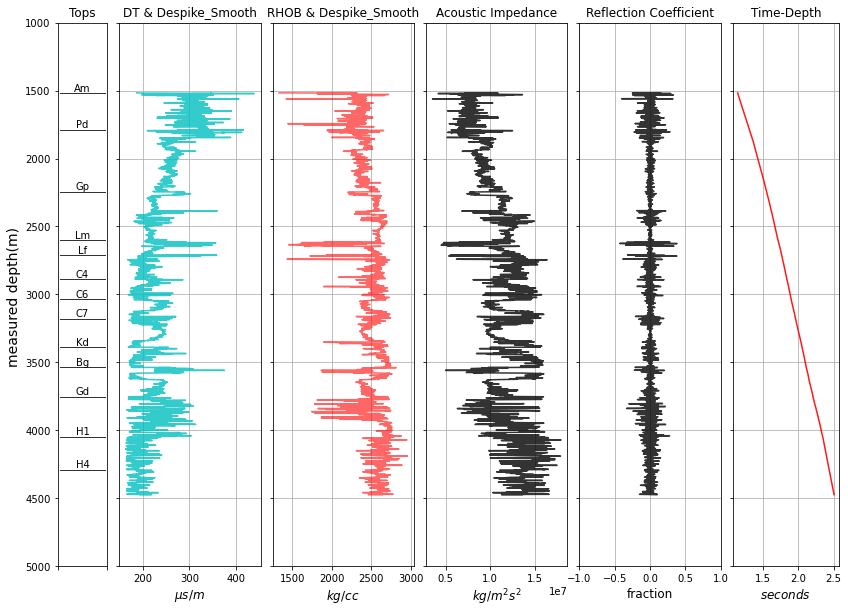

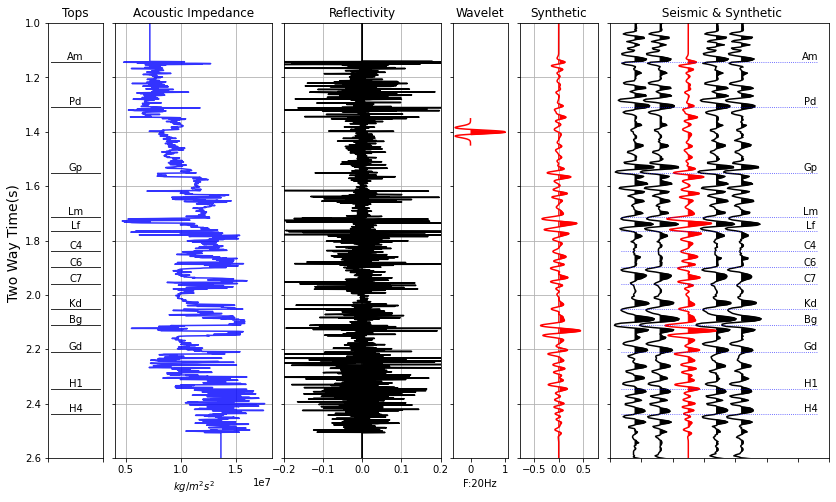

In [2]:
import welly
from welly import Well
import pandas as pd
import lasio
import numpy as np

### Loading data in and reading the header 
w = Well.from_las('KK1.las')
# w.header                      # runing with welly lib we are not able to see las header data
w_las= lasio.read(r'KK1.las') # lasio lib will help
w_las.header


#unit conversion 
w.data['DT'] = w.data['DT'] / 0.3048   #unit convert to µs/m
w.data['RHOB'] = w.data['RHOB'] * 1000  #unit convert to kg/m3

#Time-Depth Relationship 
log_start = 1517               # Depth of logging starts(m) from header
kb = 15  
gap_int = log_start - kb
repl_vel = 2632                # this is from VSP data knowledge (m/s)
log_start_time = 2.0 * gap_int / repl_vel        # 2 for twt

#first replace NaN values with zero - multiplied by dx and convert to seconds to 
# acquire the travel time through the layer t=d/v 
dt = w.data['DT']
den = w.data['RHOB']
dt_iterval = np.nan_to_num(dt.values) * 0.1524 / 1e6
t_cum =  np.cumsum(dt_iterval) * 2
TWT = t_cum + log_start_time
#w.add_header_item(item='TWT',value=TWT)

print(TWT)
print(len(TWT))

#wellbasis = w.Curve.basis
#print(wellbasis)
print(w.data['DT'].basis)
wellbasis = w.data['DT'].basis

TWTcurve = welly.curve.Curve(TWT,mnemonic='TWT',basis=wellbasis) # Create a new curve to add to the well 
print(TWTcurve)
w.data['TWT'] = TWTcurve



#Converting the data into a dataframe 
df = w.df()
print(df)


## Acoustic Impedance 
# Sonic velocity calculate
df['Vsonic'] = 1e6/df.DT   
# AI calculate
df['AI'] = df['Vsonic'] * df['RHOB']    


## Reflection Coefficient 
Imp = df['AI'].values
Rc=[]
for i in range(len(Imp)-1):
    Rc.append((Imp[i+1]-Imp[i])/(Imp[i]+Imp[i+1]))

# to adjust vector size copy the last element to the tail
Rc.append(Rc[-1])
# Let's add Rc into dataframe as new column
df['Rc'] = pd.Series(Rc, index=df.index)


## Resampling to the time domain and Rc Calculation 
dt = 0.001   #sampleing interval
t_max = 3.0   # max time to create time vector
t = np.arange(0, t_max, dt)
AI_tdom = np.interp(x=t, xp = df.TWT, fp = df.AI)  
# again Rc calulation but in reampled time domain
Rc_tdom = []
for i in range(len(AI_tdom)-1):
    Rc_tdom.append((AI_tdom[i+1]-AI_tdom[i])/(AI_tdom[i]+AI_tdom[i+1]))
# to adjust vector size copy the last element to the tail
Rc_tdom.append(Rc_tdom[-1])

## Wavelet & Convolution 
# define function of ricker wavelet
def ricker(f, length, dt):
    t0 = np.arange(-length/2, (length-dt)/2, dt)
    y = (1.0 - 2.0*(np.pi**2)*(f**2)*(t0**2)) * np.exp(-(np.pi**2)*(f**2)*(t0**2))
    return t0, y
f=20            #wavelet frequency
length=0.512    #Wavelet vector length
dt=dt           # Sampling prefer to use smiliar to resampled AI
#t0, w = ricker (f, length, dt) # ricker wavelet 

## Bruges filter test 
### Ricker Wavelet - checked - verified 
import bruges as bg
# duration =  the total length of the pulse in seconds, e.g. 0.128 for a wavelet 128 ms long.
# dt — the interval between time samples in seconds, e.g. 0.004 for a 250 Hz sample rate.
# f — the dominant frequency of the wavelet in Hertz, eg 25 for a low-frequency pulse.
w, t0 = bg.filters.ricker(duration=0.096, dt=0.001, f=25)

### Ormsby Wavelet 
# f = [f1,f2,f3,f4]  f=[4, 8, 45, 60]
#w, t0 = bg.filters.ormsby(duration=0.4, dt=0.001, f=[4, 8, 45, 60])

### Berlage wavelet 
#w, t0 = bg.filters.berlage(duration=0.400, dt=0.001, f=25)

### Generalized Wavelet 
#w, t0 = bg.filters.generalized(duration=0.096, dt=0.001, f=25)


#synthetic 
synthetic = np.convolve(w, Rc_tdom, mode='same')

#print(synthetic)

 


## Visualization 
df_top = pd.read_csv('C:/Users/jonak/OneDrive - University of Calgary/Desktop/Rockyview_Geoservices/Synthetic Generation Program/Example/mardani72/Synthetic_Seismogram-master/Synthetic_Seismogram-master/Tops.csv') # read from csv file into dataframe
tops_dept = dict(df_top.values.tolist())  # convert to dictionary
def nearest_value(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx
TWT=df.TWT.values
tops_twt={}
for key, val in tops_dept.items():
    tops_twt[key]=TWT[nearest_value(df.index, val)]

    #Figure 1 
    
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 6, sharey=True, figsize = (14,10), gridspec_kw={'width_ratios': [0.7,2,2,2,2,1.5]})
fig.subplots_adjust(wspace=0.1)
# -----------------------------------------------------------------------------------track1------------
axs[0].set_title('Tops', style = 'normal')
axs[0].set_ylabel('measured depth(m) ', fontsize = '14' )
axs[0].set_xticklabels('')
for Top in tops_dept.values() :
    axs[0].axhline( y = float(Top), color = 'k', lw = 1,   
                            alpha = 0.8, xmin = 0.05, xmax = 0.95 )
for Top, MD in tops_dept.items():
    axs[0].text( x = 0.5,  y = float(MD), s = Top,fontsize = '10', 
                horizontalalignment = 'center',verticalalignment = 'bottom')
# -----------------------------------------------------------------------------------track2------------
axs[1].plot( df.DT, df.index,'c', alpha=0.8)
#axs[1].plot( df.DT_DS_SM, df.index,'m', alpha=0.9)
axs[1].set_title('DT & Despike_Smooth', style = 'normal')
axs[1].set_xlabel( r'$\mu s/m $', fontsize = '12')
axs[1].set_ylim(1000, 5000)
axs[1].invert_yaxis()
axs[1].grid()
# -----------------------------------------------------------------------------------track3------------
axs[2].plot( df.RHOB, df.index,'r', alpha=0.6)
#axs[2].plot( df.RHOB_DS_SM, df.index,'b', alpha=0.9)
axs[2].set_title('RHOB & Despike_Smooth', style = 'normal')
axs[2].set_xlabel('$kg/cc$', fontsize = '12')
axs[2].set_ylim(1000, 5000)
axs[2].invert_yaxis()
axs[2].grid()
# -----------------------------------------------------------------------------------track4------------  
axs[3].plot( df.AI, df.index,'k', alpha=0.8)
axs[3].set_title('Acoustic Impedance', style = 'normal')
axs[3].set_xlabel( r'$kg/m^2s^2$', fontsize = '12')
axs[3].set_ylim(1000, 5000)
axs[3].invert_yaxis()
axs[3].grid()
# -----------------------------------------------------------------------------------track5-----------
axs[4].plot( df.Rc, df.index,'k', alpha=0.8)
axs[4].set_title('Reflection Coefficient', style = 'normal')
axs[4].set_xlabel('fraction' , fontsize = '12')
axs[4].set_ylim(1000, 5000)
axs[4].set_xlim(-1, 1)
axs[4].invert_yaxis()
axs[4].grid()
# -----------------------------------------------------------------------------------track6------------
axs[5].plot( df.TWT, df.index,'r', alpha=0.9)
axs[5].set_title('Time-Depth', style = 'normal')
axs[5].set_xlabel( '$seconds$', fontsize = '12')
axs[5].set_ylim(1000, 5000)
axs[5].invert_yaxis()
# axs[5].set_yticklabels('')
axs[5].grid()
#plt.savefig('Fig1.png', dpi=300)



    # Figure 2 
df_offset_seis= pd.read_csv('C:/Users/jonak/OneDrive - University of Calgary/Desktop/Rockyview_Geoservices/Synthetic Generation Program/Example/mardani72/Synthetic_Seismogram-master/Synthetic_Seismogram-master/around_well_seismic.csv')
fig, axs = plt.subplots(1, 6, sharey=False, figsize = (14,8), gridspec_kw={'width_ratios': [0.7,2,2,0.7,1,2.8]})
fig.subplots_adjust(wspace=0.1)
# -----------------------------------------------------------------------------------track1------------
axs[0].set_title('Tops', style = 'normal')
axs[0].set_ylabel('Two Way Time(s) ', fontsize = '14' )
axs[0].set_xticklabels('')
axs[0].set_ylim(1 , 2.6)
axs[0].invert_yaxis()

for Top in tops_twt.values() :
    axs[0].axhline( y = float(Top), color = 'k', lw = 1,   
                            alpha = 0.8, xmin = 0.05, xmax = 0.95 )
for Top, S in tops_twt.items():
    axs[0].text( x = 0.5,  y = float(S), s = Top,fontsize = '10', 
                horizontalalignment = 'center',verticalalignment = 'bottom')
# -----------------------------------------------------------------------------------track2------------
axs[1].plot( AI_tdom, t,'b', alpha=0.8)
axs[1].set_title('Acoustic Impedance', style = 'normal')
axs[1].set_xlabel( r'$kg/m^2s^2$', fontsize = '10')
axs[1].set_ylim(1 , 2.6)
axs[1].set_yticklabels('')
axs[1].invert_yaxis()
axs[1].grid()
# -----------------------------------------------------------------------------------track3------------
axs[2].plot( Rc_tdom, t,'k')
axs[2].plot([0, 0], [t.min(), t.max()], '-', c='k')
axs[2].set_title('Reflectivity', style = 'normal')
axs[2].set_ylim(1 , 2.6)
axs[2].set_xlim(-0.2 , 0.2)
axs[2].set_yticklabels('')
axs[2].invert_yaxis()
axs[2].grid()
# -----------------------------------------------------------------------------------track4------------   
axs[3].plot( w, t0+1.4,'r', alpha=0.99)
axs[3].fill_betweenx(t0+1.4 , w,  0,  w > 0.0,  color='r')
axs[3].set_title('Wavelet', style = 'normal')
axs[3].set_xlabel('F:'+ str(f)+'Hz' , fontsize = '10')
axs[3].set_yticklabels('')
axs[3].set_ylim(1 , 2.6)
axs[3].invert_yaxis()
# -----------------------------------------------------------------------------------track5------------
axs[4].plot( synthetic, t ,'r')
axs[4].fill_betweenx(t, synthetic,  0,  synthetic > 0,  color='r')
axs[4].set_title('Synthetic', style = 'normal')
axs[4].set_ylim(1 , 2.6)
axs[4].set_xlim(-0.8 , 0.8)
axs[4].invert_yaxis()
axs[4].set_yticklabels('')
axs[4].grid()
# -----------------------------------------------------------------------------------track6------------
offsets=[0.4, 0.8 , 1.25, 1.7, 2.1]

x1= (df_offset_seis.cdp409.values/1e5) + offsets[0]
x2= (df_offset_seis.cdp410.values/1e5) + offsets[1]
x3= (df_offset_seis.cdp412.values/1e5) + offsets[3]
x4= (df_offset_seis.cdp413.values/1e5) + offsets[4]
t_sei=df_offset_seis.time

axs[5].plot( x1, t_sei ,'k')
axs[5].fill_betweenx(t_sei, offsets[0] , x1, where=(x1>offsets[0]),color='k')
axs[5].plot( x2, t_sei ,'k')
axs[5].fill_betweenx(t_sei, offsets[1] , x2, where=(x2>offsets[1]),color='k')
axs[5].plot( synthetic+offsets[2], t ,'r')
axs[5].fill_betweenx(t, offsets[2] , (synthetic+offsets[2]),
                     where=((synthetic+offsets[2])>offsets[2]),color='r')
axs[5].plot( x3, t_sei ,'k')
axs[5].fill_betweenx(t_sei, offsets[3] , x3, where=(x3>offsets[3]),color='k')
axs[5].plot( x4, t_sei ,'k')
axs[5].fill_betweenx(t_sei, offsets[4] , x4, where=(x4>offsets[4]),color='k')

axs[5].set_title(' Seismic & Synthetic', style = 'normal')
axs[5].set_yticklabels('')
axs[5].set_xticklabels('')
axs[5].set_ylim(1 , 2.6)
axs[5].set_xlim(0 , 03.5)
axs[5].invert_yaxis()
for Top in tops_twt.values() :
    axs[5].axhline( y = float(Top), color = 'b', lw = 0.8, ls = ':', 
                   alpha = 0.8, xmin = 0.05, xmax = 0.95 )
for Top, S in tops_twt.items():
    axs[5].text( x = 3.2,  y = float(S), s = Top,fontsize = '10', 
                horizontalalignment = 'center',verticalalignment = 'bottom')    

#plt.savefig('Fig2.png', dpi=600)
